# Sequence Optimization - Scenario 1

- There will be two tables as the output. Table 1 is for the people in J0, and the other one is for K0.
- Table 1 focuses on lane assignment according to vehicle type.
- Table 2 focuses on reordering the sequence to be as optimal as possible, allowing a maximum movement of up to 4 rows for delayed types and up to 3 rows for others.


In [106]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

from ortools.sat.python import cp_model


## Import Data


In [107]:
root = "/Users/finazaria/Documents/03 Deloitte/03e Data"

In [108]:
alc = pd.read_csv(f"alc-prd_stg.stg_datacenter_t_datacenter-aug24_2.csv", delimiter=";")
alc.head()

,ref_no,body_no,id_no,vin_no,curr_tp,bodyseq_w,bodyseq_a,model_no,p_sfx,s_sfx,ext_color,plant_code,lo_date,prod_month,ide,dest_code,destination,plan_date_a0,plan_time_a0,plan_date_c0,plan_time_c0,plan_date_d0,plan_time_d0,plan_date_e0,plan_time_e0,plan_date_g0,plan_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,plan_date_n0,plan_time_n0,plan_date_q0,plan_time_q0,psa0,psc0,psd0,pse0,psg0,psj0,psk0,psn0,psq0,proc_date_a0,proc_time_a0,proc_date_c0,proc_time_c0,proc_date_d0,proc_time_d0,proc_date_e0,proc_time_e0,proc_date_g0,proc_time_g0,proc_date_j0,proc_time_j0,proc_date_k0,proc_time_k0,proc_date_n0,proc_time_n0,proc_date_q0,proc_time_q0,proc_date_v1,proc_time_v1,proc_date_g1,proc_time_g1,proc_date_v2,proc_time_v2,proc_date_c1,proc_time_c1,asa0,asc0,asd0,ase0,asg0,asj0,ask0,asn0,asq0,asv1,asg1,asv2,asc1,prc_ts,source_system
0,AD48019531,56193,DH08160078,MHFAB1BY0S3115520,4Q0,902,825.0,W101LE-LBGF,2J,A1,S28,D,20240816,202408,E,202,COSTA RICA,20240815,102800,20240815,201300,20240815,205200,,,,,20240815,52600,20240816,72800,20240816,132900,20240816,145600,1,2,2,,,2,1,1,1,20240815,132748,20240815.0,172506.0,20240815.0,175433.0,20240815.0,225157.0,20240815.0,235608.0,20240815.0,31131.0,20240815.0,33448.0,20240816.0,102958.0,20240816.0,131707.0,NaN,NaN,20240815.0,25550.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC
1,AD48019533,53510,DH08090077,MHFAB1BY6S3114551,4Q0,219,293.0,W101LE-LBGF,2J,A1,W09,D,20240809,202408,E,202,COSTA RICA,20240808,73300,20240808,110400,20240808,114300,,,,,20240808,231900,20240808,234500,20240808,51800,20240809,81100,1,1,1,,,2,2,2,1,20240808,72237,20240808.0,110535.0,20240808.0,165341.0,20240808.0,232120.0,20240808.0,5830.0,20240808.0,33041.0,20240808.0,41012.0,20240809.0,113411.0,20240809.0,140953.0,NaN,NaN,20240808.0,31907.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC
2,AD48019535,50603,DH08010068,MHFAB1BY6S3113514,4Q0,312,233.0,W101LE-LBGF,2J,A1,W09,D,20240801,202408,E,202,COSTA RICA,20240731,94900,20240731,142000,20240731,150900,,,,,20240731,50200,20240731,52700,20240801,123500,20240801,141200,1,1,1,,,2,2,1,1,20240731,100114,20240731.0,155116.0,20240731.0,162732.0,20240731.0,223413.0,20240731.0,232558.0,20240731.0,25137.0,20240731.0,30421.0,20240801.0,100724.0,20240801.0,112407.0,NaN,NaN,20240731.0,22623.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC
3,AD48019538,53060,DH08080077,MHFAB1BY8S3114390,4Q0,769,717.0,W101LE-LBGF,2J,A1,W09,D,20240808,202408,E,202,COSTA RICA,20240807,103400,20240807,140100,20240807,145000,,,,,20240807,20200,20240807,22700,20240808,90700,20240808,103400,1,1,1,,,2,2,1,1,20240807,94547,20240807.0,135728.0,20240807.0,142159.0,20240807.0,204715.0,20240807.0,214601.0,20240807.0,14854.0,20240807.0,21637.0,20240808.0,90625.0,20240808.0,110517.0,NaN,NaN,20240807.0,13716.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC
4,AD48019539,54630,DH08130070,MHFAB1BY5S3114959,4Q0,339,293.0,W101LE-LBGF,2J,A1,W09,D,20240813,202408,E,202,COSTA RICA,20240812,90500,20240812,140900,20240812,145800,,,,,20240812,21300,20240812,24900,20240813,91700,20240813,104300,1,1,1,,,2,2,1,1,20240812,95010,20240812.0,135844.0,20240812.0,144611.0,20240812.0,205231.0,20240812.0,215628.0,20240812.0,15629.0,20240812.0,23020.0,20240813.0,94612.0,20240813.0,105246.0,NaN,NaN,20240812.0,14432.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC


In [109]:
def check_null(df):
    total_entries = len(df)  # Total number of entries in the DataFrame

    # Calculate null counts for each column
    null_data = df.isnull().sum()

    # Calculate percentage of nulls for each column
    percent_null = (null_data / total_entries * 100).round(2)

    # Create a DataFrame to display null counts and percentages
    result = pd.DataFrame({
        'Null Counts': null_data,
        'Percentage Null': percent_null.astype(str) + '%'
    })
    
    return result

In [110]:
pd.set_option('display.max_rows', None)
check_null(alc)

,Null Counts,Percentage Null
ref_no,0,0.0%
body_no,0,0.0%
id_no,0,0.0%
vin_no,0,0.0%
curr_tp,0,0.0%
bodyseq_w,0,0.0%
bodyseq_a,793,4.7%
model_no,0,0.0%
p_sfx,0,0.0%
s_sfx,0,0.0%


In [111]:
pd.reset_option('display.max_rows')

## EDA - Number of vehicle in each process


In [112]:
# Sort out vehicles who're not in production anymore
alc_out = alc[(alc['curr_tp'] == '4Q0') | (alc['curr_tp'] == '1Q0')]
len(alc_out)

15688

In [113]:
alc_in = alc[(alc['curr_tp'] != '4Q0') & (alc['curr_tp'] != '1Q0')]
len(alc_in)

1185

In [114]:
# Remove prefix
alc_in['curr_tp_comb'] = alc_in['curr_tp'].str.extract('(\d)(.*)')[1]

# Count the occurrences of each type in the 'vehicle_type' column
curr_tp_counts = alc_in['curr_tp_comb'].value_counts()
print(curr_tp_counts)

curr_tp_comb
K0         286
A0         234
G0         198
D0         177
,00E+00    119
N0         106
C0          33
J0          25
G1           7
Name: count, dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\1744750565.py:2: SyntaxWarning: invalid escape sequence '\d'
  alc_in['curr_tp_comb'] = alc_in['curr_tp'].str.extract('(\d)(.*)')[1]
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\1744750565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alc_in['curr_tp_comb'] = alc_in['curr_tp'].str.extract('(\d)(.*)')[1]


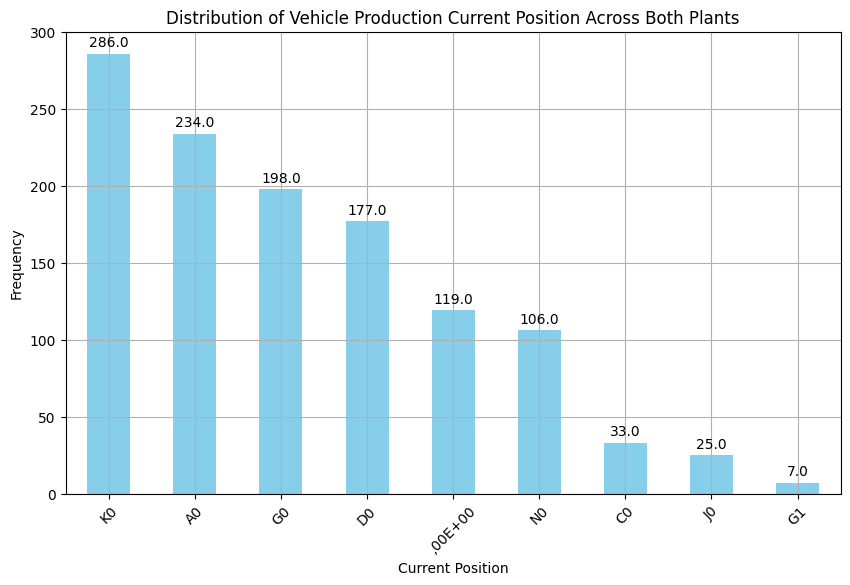

In [115]:
# Visualize
plt.figure(figsize=(10, 6))
bars = curr_tp_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Production Current Position Across Both Plants')
plt.xlabel('Current Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)

# Adding data labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.1f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

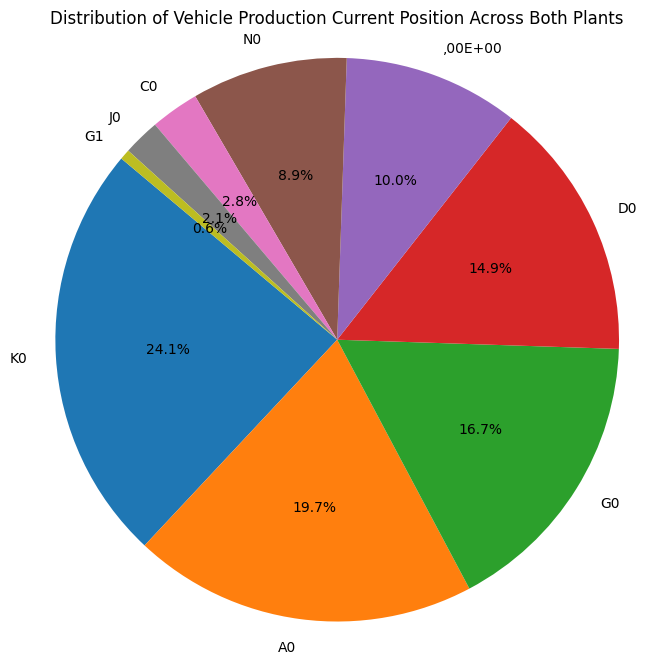

In [116]:
# Pie chart visualization

plt.figure(figsize=(8, 8))
plt.pie(curr_tp_counts, labels=curr_tp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle Production Current Position Across Both Plants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Data Preperation


In [117]:
total_prod = alc['vin_no'].nunique()
total_prod

16873

In [118]:
alc['plant_no'] = np.where(alc['curr_tp'].str.startswith('1'), 1, 2)
alc.head()

,ref_no,body_no,id_no,vin_no,curr_tp,bodyseq_w,bodyseq_a,model_no,p_sfx,s_sfx,ext_color,plant_code,lo_date,prod_month,ide,dest_code,destination,plan_date_a0,plan_time_a0,plan_date_c0,plan_time_c0,plan_date_d0,plan_time_d0,plan_date_e0,plan_time_e0,plan_date_g0,plan_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,plan_date_n0,plan_time_n0,plan_date_q0,plan_time_q0,psa0,psc0,psd0,pse0,psg0,psj0,psk0,psn0,psq0,proc_date_a0,proc_time_a0,proc_date_c0,proc_time_c0,proc_date_d0,proc_time_d0,proc_date_e0,proc_time_e0,proc_date_g0,proc_time_g0,proc_date_j0,proc_time_j0,proc_date_k0,proc_time_k0,proc_date_n0,proc_time_n0,proc_date_q0,proc_time_q0,proc_date_v1,proc_time_v1,proc_date_g1,proc_time_g1,proc_date_v2,proc_time_v2,proc_date_c1,proc_time_c1,asa0,asc0,asd0,ase0,asg0,asj0,ask0,asn0,asq0,asv1,asg1,asv2,asc1,prc_ts,source_system,plant_no
0,AD48019531,56193,DH08160078,MHFAB1BY0S3115520,4Q0,902,825.0,W101LE-LBGF,2J,A1,S28,D,20240816,202408,E,202,COSTA RICA,20240815,102800,20240815,201300,20240815,205200,,,,,20240815,52600,20240816,72800,20240816,132900,20240816,145600,1,2,2,,,2,1,1,1,20240815,132748,20240815.0,172506.0,20240815.0,175433.0,20240815.0,225157.0,20240815.0,235608.0,20240815.0,31131.0,20240815.0,33448.0,20240816.0,102958.0,20240816.0,131707.0,NaN,NaN,20240815.0,25550.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC,2
1,AD48019533,53510,DH08090077,MHFAB1BY6S3114551,4Q0,219,293.0,W101LE-LBGF,2J,A1,W09,D,20240809,202408,E,202,COSTA RICA,20240808,73300,20240808,110400,20240808,114300,,,,,20240808,231900,20240808,234500,20240808,51800,20240809,81100,1,1,1,,,2,2,2,1,20240808,72237,20240808.0,110535.0,20240808.0,165341.0,20240808.0,232120.0,20240808.0,5830.0,20240808.0,33041.0,20240808.0,41012.0,20240809.0,113411.0,20240809.0,140953.0,NaN,NaN,20240808.0,31907.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC,2
2,AD48019535,50603,DH08010068,MHFAB1BY6S3113514,4Q0,312,233.0,W101LE-LBGF,2J,A1,W09,D,20240801,202408,E,202,COSTA RICA,20240731,94900,20240731,142000,20240731,150900,,,,,20240731,50200,20240731,52700,20240801,123500,20240801,141200,1,1,1,,,2,2,1,1,20240731,100114,20240731.0,155116.0,20240731.0,162732.0,20240731.0,223413.0,20240731.0,232558.0,20240731.0,25137.0,20240731.0,30421.0,20240801.0,100724.0,20240801.0,112407.0,NaN,NaN,20240731.0,22623.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC,2
3,AD48019538,53060,DH08080077,MHFAB1BY8S3114390,4Q0,769,717.0,W101LE-LBGF,2J,A1,W09,D,20240808,202408,E,202,COSTA RICA,20240807,103400,20240807,140100,20240807,145000,,,,,20240807,20200,20240807,22700,20240808,90700,20240808,103400,1,1,1,,,2,2,1,1,20240807,94547,20240807.0,135728.0,20240807.0,142159.0,20240807.0,204715.0,20240807.0,214601.0,20240807.0,14854.0,20240807.0,21637.0,20240808.0,90625.0,20240808.0,110517.0,NaN,NaN,20240807.0,13716.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC,2
4,AD48019539,54630,DH08130070,MHFAB1BY5S3114959,4Q0,339,293.0,W101LE-LBGF,2J,A1,W09,D,20240813,202408,E,202,COSTA RICA,20240812,90500,20240812,140900,20240812,145800,,,,,20240812,21300,20240812,24900,20240813,91700,20240813,104300,1,1,1,,,2,2,1,1,20240812,95010,20240812.0,135844.0,20240812.0,144611.0,20240812.0,205231.0,20240812.0,215628.0,20240812.0,15629.0,20240812.0,23020.0,20240813.0,94612.0,20240813.0,105246.0,NaN,NaN,20240812.0,14432.0,NaN,NaN,NaN,NaN,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0,NaN,NaN,"2,02408E+13",ALC,2


In [119]:
# Get sequence of cars in G0 (One station before J0)
g0 = alc[(alc['curr_tp'] == '1G0') | (alc['curr_tp'] == '4G0')]
prod_g0 = len(g0)
print('Number of vehicle in J0:', prod_g0)


Number of vehicle in J0: 198


In [120]:
# Take only G0 from plant 1
g0_1 = g0[g0['plant_no'] == 1]
prod_g0_1 = len(g0_1)
print('Number of vehicle in G0 - Plant 1:', prod_g0_1)

Number of vehicle in G0 - Plant 1: 94


In [121]:
g0_1.head()

,ref_no,body_no,id_no,vin_no,curr_tp,bodyseq_w,bodyseq_a,model_no,p_sfx,s_sfx,ext_color,plant_code,lo_date,prod_month,ide,dest_code,destination,plan_date_a0,plan_time_a0,plan_date_c0,plan_time_c0,plan_date_d0,plan_time_d0,plan_date_e0,plan_time_e0,plan_date_g0,plan_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,plan_date_n0,plan_time_n0,plan_date_q0,plan_time_q0,psa0,psc0,psd0,pse0,psg0,psj0,psk0,psn0,psq0,proc_date_a0,proc_time_a0,proc_date_c0,proc_time_c0,proc_date_d0,proc_time_d0,proc_date_e0,proc_time_e0,proc_date_g0,proc_time_g0,proc_date_j0,proc_time_j0,proc_date_k0,proc_time_k0,proc_date_n0,proc_time_n0,proc_date_q0,proc_time_q0,proc_date_v1,proc_time_v1,proc_date_g1,proc_time_g1,proc_date_v2,proc_time_v2,proc_date_c1,proc_time_c1,asa0,asc0,asd0,ase0,asg0,asj0,ask0,asn0,asq0,asv1,asg1,asv2,asc1,prc_ts,source_system,plant_no
803,AD48023087,22309,D908210147,MHFKX8FS8R0321930,1G0,250,NaN,TGN156L-SDTSKV,DB,B1,89,D,20240821,202408,E,611,BAHRAIN,20240820,130300,20240820,161800,20240820,164300,,,,,20240820,45500,20240820,52800,20240821,110200,20240821,130800,1,1,1,,,2,2,1,1,20240820,111751,20240820.0,172203.0,20240820.0,210932.0,20240820.0,4150.0,20240820.0,30743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,02408E+13",ALC,1
4018,AD48027696,22376,D108210095,MHFJB8EM0R1141865,1G0,317,NaN,GUN142R-MDTSXD,JG,20,218,D,20240821,202408,D,807,INDONESIA,20240820,150400,20240820,224000,20240820,230500,,,,,20240821,85100,20240821,92400,20240821,140900,20240821,153900,1,2,2,,,1,1,1,1,20240820,142447,20240820.0,225144.0,20240820.0,232615.0,20240820.0,30131.0,20240820.0,53116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,02408E+13",ALC,1
7987,AD48036684,22380,D908210034,MHFAA3GS6R0751244,1G0,321,NaN,GUN166L-SDTHXM,CK,F4,1D6,D,20240821,202408,E,811,PHILIPPINE,20240820,151100,20240820,224500,20240820,231000,,,,,20240821,85900,20240821,94200,20240821,141600,20240821,154700,1,2,2,,,1,1,1,1,20240820,143106,20240820.0,230225.0,20240820.0,233353.0,20240820.0,31019.0,20240820.0,53820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,02408E+13",ALC,1
9050,AD48036474,22353,D908210014,MHFBA3FS5R1055961,1G0,294,NaN,GUN156L-SDTHXM,BN,F7,2PS,D,20240821,202408,E,811,PHILIPPINE,20240820,141600,20240820,214700,20240820,222200,,,,,20240821,124100,20240821,131400,20240821,222800,20240821,234900,1,2,2,,,1,1,2,2,20240820,134154,20240820.0,221354.0,20240820.0,224814.0,20240820.0,20955.0,20240821.0,103557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,02408E+13",ALC,1
12539,AD48022855,22556,D908220052,MHFBU3FS4S0352903,1G0,497,NaN,GGN155L-SDTHK,AA,P7,218,D,20240822,202408,E,307,ECUADOR,20240820,232500,20240820,44600,20240820,51000,,,,,20240821,150700,20240821,155200,20240821,12600,20240821,25700,2,2,2,,,1,1,2,2,20240820,457,20240820.0,43640.0,20240820.0,53947.0,20240821.0,84249.0,20240821.0,110505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,02408E+13",ALC,1


In [122]:
# Take only important columns

g0_column = ['body_no', 'vin_no', 'curr_tp', 'model_no', 'p_sfx', 's_sfx', 'ext_color', 'proc_date_g0', 'proc_time_g0', 'plan_date_j0', 'plan_time_j0',
                'plan_date_k0', 'plan_time_k0'
]

In [123]:
# Take data from plant 1 for example

g0_1_cleaned = g0_1[g0_column]
g0_1_cleaned.head()

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0
803,22309,MHFKX8FS8R0321930,1G0,TGN156L-SDTSKV,DB,B1,89,20240820.0,30743.0,20240820,45500,20240820,52800
4018,22376,MHFJB8EM0R1141865,1G0,GUN142R-MDTSXD,JG,20,218,20240820.0,53116.0,20240821,85100,20240821,92400
7987,22380,MHFAA3GS6R0751244,1G0,GUN166L-SDTHXM,CK,F4,1D6,20240820.0,53820.0,20240821,85900,20240821,94200
9050,22353,MHFBA3FS5R1055961,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,103557.0,20240821,124100,20240821,131400
12539,22556,MHFBU3FS4S0352903,1G0,GGN155L-SDTHK,AA,P7,218,20240821.0,110505.0,20240821,150700,20240821,155200


In [124]:
# Check for date
g0_1_cleaned['proc_date_g0'].unique()

array([20240820., 20240821.])

In [125]:
# Take the date 20240821
g0_1_cleaned = g0_1_cleaned[g0_1_cleaned['proc_date_g0'] == 20240821]

In [126]:
pd.set_option('display.max_columns', None)

g0_1_cleaned.head(10)

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0
9050,22353,MHFBA3FS5R1055961,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,103557.0,20240821,124100,20240821,131400
12539,22556,MHFBU3FS4S0352903,1G0,GGN155L-SDTHK,AA,P7,218,20240821.0,110505.0,20240821,150700,20240821,155200
12543,22517,MHFCX8GS1R0265672,1G0,TGN166L-SDTLKV,DJ,LE,1G3,20240821.0,100609.0,20240821,135800,20240821,145200
12548,22497,MHFDX8FS8R0141632,1G0,TGN156L-SDTLKV,C5,JA,89,20240821.0,92510.0,20240821,132400,20240821,135700
12554,22501,MHFDX8FSXR0141633,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,94233.0,20240821,133200,20240821,140500
12561,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300
12565,22551,MHFABBAA5R0430464,1G0,MAGH10L-BRXHBV,DQ,L2,89,20240821.0,105545.0,20240821,150100,20240821,154500
12567,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800
12570,22541,MHFABAAA4R0026341,1G0,MAGH10L-BRXLBV,CL,AH,1D6,20240821.0,104204.0,20240821,144600,20240821,153100
12580,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600


In [127]:
# Sort g0 based on proc_time_g0 to know the sequence

g0_1_cleaned = g0_1_cleaned.sort_values(by='proc_time_g0')
g0_1_cleaned.head(10)

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0
14261,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400
14337,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100
12561,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300
14141,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700
12567,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800
16635,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900
12745,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100
12600,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400
12762,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400
12580,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600


### Join j0 with Restriction Table


In [128]:
rest = pd.read_excel(f"Master Restriksi.xlsx")
rest.head()

,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Des,DesCode,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA
0,DDC9,DD,NSP151R-CHMVKD,C9,FE26,CBU Domestic,DOM,Manual,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA
1,DDYA,DD,NSP151R-CHMVKD,YA,FE26,CBU Domestic,DOM,Manual,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA
2,DDC3,DD,NSP151R-CHXVKD,C3,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA
3,DDYB,DD,NSP151R-CHXVKD,YB,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA
4,DDC4,DD,NSP151R-CHXVKD,C4,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,CSA


In [129]:
# Create a column to later join j0_1_cleaned with rest table
g0_1_cleaned['katashiki_sfx_alc'] = (g0_1_cleaned['model_no'].str.strip()).str.cat(g0_1_cleaned['p_sfx'], sep="-")
g0_1_cleaned


,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc
14261,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN
14337,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4
12561,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT
14141,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG
12567,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,22489,MHFAA3GS1R0751247,1G0,GUN166L-SDTHXM,CL,F5,2PS,20240821.0,110015.0,20240821,221500,20240821,224800,GUN166L-SDTHXM-CL
14081,22554,MHFKX8FS800321932,1G0,TGN156L-SDTSKN,EQ,P3,218,20240821.0,110201.0,20240821,150500,20240821,154900,TGN156L-SDTSKN-EQ
12789,22555,MHFABAAAXR0026344,1G0,MAGH10R-BRXLBD,C4,1,89,20240821.0,110342.0,20240821,150600,20240821,155100,MAGH10R-BRXLBD-C4
12539,22556,MHFBU3FS4S0352903,1G0,GGN155L-SDTHK,AA,P7,218,20240821.0,110505.0,20240821,150700,20240821,155200,GGN155L-SDTHK-AA


In [130]:
# Create a new column for rest table
rest['katashiki_sfx_rest'] = (rest['Katashiki'].str.strip()).str.cat(rest['SFX'], sep="-")
rest.head()

,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Des,DesCode,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest
0,DDC9,DD,NSP151R-CHMVKD,C9,FE26,CBU Domestic,DOM,Manual,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA,NSP151R-CHMVKD-C9
1,DDYA,DD,NSP151R-CHMVKD,YA,FE26,CBU Domestic,DOM,Manual,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA,NSP151R-CHMVKD-YA
2,DDC3,DD,NSP151R-CHXVKD,C3,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA,NSP151R-CHXVKD-C3
3,DDYB,DD,NSP151R-CHXVKD,YB,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,Non CSA,NSP151R-CHXVKD-YB
4,DDC4,DD,NSP151R-CHXVKD,C4,FE26,CBU Domestic,DOM,Automatic,Conventional,Non Pano,2NR-FE,Non GGN,CSA,NSP151R-CHXVKD-C4


In [131]:
# Join two tables
g0_1_mapped = pd.merge(g0_1_cleaned, rest, 
                    left_on='katashiki_sfx_alc', 
                    right_on='katashiki_sfx_rest', 
                    how='left')

g0_1_mapped = g0_1_mapped.drop_duplicates(subset=['vin_no'])
g0_1_mapped

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Des,DesCode,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,CBU PHILIPPINE,EXP,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Domestic - IND OPTION PKG,DOM,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,CBU SAUDI ARABIA,EXP,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT
4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,CBU DOMESTIC,DOM,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG
5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,UAE,EXP,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,22489,MHFAA3GS1R0751247,1G0,GUN166L-SDTHXM,CL,F5,2PS,20240821.0,110015.0,20240821,221500,20240821,224800,GUN166L-SDTHXM-CL,D9CL,D9,GUN166L-SDTHXM,CL,LF31,CBU PHILIPPINE,EXP,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN166L-SDTHXM-CL
127,22554,MHFKX8FS800321932,1G0,TGN156L-SDTSKN,EQ,P3,218,20240821.0,110201.0,20240821,150500,20240821,154900,TGN156L-SDTSKN-EQ,D9EQ,D9,TGN156L-SDTSKN,EQ,FN22,GENERAL,EXP,Automatic,Conventional,Non Pano,TR-Gasoline,Non GGN,Non CSA,TGN156L-SDTSKN-EQ
128,22555,MHFABAAAXR0026344,1G0,MAGH10R-BRXLBD,C4,1,89,20240821.0,110342.0,20240821,150600,20240821,155100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Domestic - IND OPTION PKG,DOM,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4
130,22556,MHFBU3FS4S0352903,1G0,GGN155L-SDTHK,AA,P7,218,20240821.0,110505.0,20240821,150700,20240821,155200,GGN155L-SDTHK-AA,D9AA,D9,GGN155L-SDTHK,AA,FN22,CBU ECUADOR,EXP,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GGN155L-SDTHK-AA


In [132]:
# Dropped unused columns
g0_1_mapped = g0_1_mapped.drop(['Des', 'DesCode'], axis=1)
g0_1_mapped.head(10)

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT
4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG
5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT
7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7
8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT
9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG
10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK
12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR


In [133]:
# g0_1_mapped.to_excel("../output/j0_1_mapped.xlsx")

### Mapping vehicle to C-MPV / IMV / Bypass


In [134]:
# Check for Bypass

# Calculate differences with the previous and next row
g0_1_mapped['diff_prev'] = g0_1_mapped['body_no'] - g0_1_mapped['body_no'].shift(1)
g0_1_mapped['diff_next'] = g0_1_mapped['body_no'].shift(-1) - g0_1_mapped['body_no']

# Update 'type' to 'delay' where the difference is greater than 18, else "Not Assigned"
g0_1_mapped['type'] = g0_1_mapped.apply(
    lambda row: 'delay' if (abs(pd.notna(row['diff_prev']) and row['diff_prev']) > 18) and 
                           (abs(pd.notna(row['diff_next']) and row['diff_next']) > 18) else "Not Assigned",
    axis=1
)

# Optionally, you might want to drop the auxiliary columns 'diff_prev' and 'diff_next' after updating 'type'
g0_1_mapped.drop(columns=['diff_prev', 'diff_next'], inplace=True)

g0_1_mapped.head(20)


,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,Not Assigned
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,Not Assigned
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay
4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,Not Assigned
5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,Not Assigned
7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,Not Assigned
8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,Not Assigned
9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,Not Assigned
10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,Not Assigned
12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,Not Assigned


In [135]:
# Check for C-MPV

# Import list of cmpv katashiki
cmpv = pd.read_excel(f"katashiki_c-mpv.xlsx")

# Create a set from cmpv for quick membership checking
cmpv_set = set(cmpv['katashiki_sfx'])

g0_1_mapped.loc[
    (g0_1_mapped['type'] == "Not Assigned") & g0_1_mapped['katashiki_sfx_alc'].isin(cmpv_set),
    'type'
] = 'cmpv'

# g0_1_mapped


In [136]:
# Check for IMV

# Import list of cmpv katashiki
imv = pd.read_excel(f"katashiki_imv.xlsx")

# Create a set from cmpv for quick membership checking
imv_set = set(imv['katashiki_sfx'])

g0_1_mapped.loc[
    (g0_1_mapped['type'] == "Not Assigned") & g0_1_mapped['katashiki_sfx_alc'].isin(imv_set),
    'type'
] = 'imv'

# g0_1_mapped


In [137]:
# Check if all rows are assigned
g0_1_mapped.value_counts('type')

type
cmpv            42
imv             35
delay            9
Not Assigned     1
Name: count, dtype: int64

## Sequence Optimization & Lane Assignments

- Goal: Assign every vehicle in J0 to their respective lane based on production rules & restrictions


### Rules & Restrictions


1. Lanes:

- Lane 1 & 2: C-MPV => Can be identified from Katashiki
- Lane 3 & 4: IMV => Fortuner & Innova
- Lane 5: Bypass => Delay

2. HV

- Two hybrid cars cannot be processed right after each other, must have 1 car non-hybrid processed in the middle
- j0_1_mapped['Hybrid'] == "Hybrid"

3. Panoramic

- There must be 3 non-panoramic cars in between each panoramic cars
- j0_1_mapped['Panoramic'] == "PANO"

4. CSA

- There must be 4 Non-CSA cars in between each CSA cars
- j0_1_mapped['CSA'] == "CSA"

####gausah dulu

- Dummy delay rule: the proc_time >= 2 hours after the initial plan_time
- Logic: proc_time_j0 - plan_time_j0 > 20000


### Data Preparation


In [346]:
# Take only the first 30
g0_mapped_30 = g0_1_mapped[:30]

# g0_mapped_30 = g0_1_mapped[:30]

In [ ]:
g0_mapped_30 = g0_mapped_30.reset_index()

g0_mapped_30 = g0_mapped_30.drop('index', axis=1)

g0_mapped_30

### Lane Assignment

Note:

- Order masuk: According to sequence (sorted by proc_time_g0)
- Order keluar: According to best optimal sequence


In [337]:
import numpy as np

# Assign 'delay' vehicles to lane 5 and randomly assign other vehicles to lanes 1-4
g0_mapped_30['assg_lane_in'] = np.where(
    g0_mapped_30['type'] == 'delay',  # condition
    '5',                              # value if condition is true
    np.random.choice(['1', '2', '3', '4'], size=len(g0_mapped_30))  # randomize for other types
)

# g0_mapped_30

C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\370695020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g0_mapped_30['assg_lane_in'] = np.where(


In [140]:
#reordering vehicle based on their line

g0_mapped_30_line_seq = g0_mapped_30.sort_values(by='assg_lane_in')
# g0_mapped_30_line_seq

### Constraint Violation Checker with CP

- Currently, if we sort the rows by `proc_time_g0`, the table's already sorted by `body_no` as well. It means that the sequence / order is already correct or close to the ones in A0 where's no delay. This also means that all constraints are already met. Right now, we just have to check and make sure if the constraints are still met

- If all the constraints are already met, berarti langsung bisa di numbering 1 2 3 4

- Future: Ask if kalo gak 1 2 khusus untuk cmpv, dll gapapa gak


#### Constraints Prioritization (Please Confirm)

1. Delay
2. HV
3. Panoramic
4. CSA


In [141]:
# Constraint Checker Function v01 - no location

# def check_constraints(df):
#     # Initialize the result column with "Pass" for all rows initially
#     df['constraint_checker'] = "Pass"

#     # Check Hybrid constraint
#     hybrid_indices = df.index[df['Hybrid'] == 'Hybrid'].tolist()
#     for i, idx in enumerate(hybrid_indices):
#         if i > 0:  # Check if there's a previous hybrid
#             if (idx - hybrid_indices[i - 1]) <= 2:  # Should be more than 1 non-hybrid in between
#                 df.at[idx, 'constraint_checker'] = "Failed"
#                 df.at[hybrid_indices[i - 1], 'constraint_checker'] = "Failed"

#     # Check Panoramic constraint
#     panoramic_indices = df.index[df['Panoramic'] == 'PANO'].tolist()
#     for i, idx in enumerate(panoramic_indices):
#         if i > 0:  # Check if there's a previous panoramic
#             if (idx - panoramic_indices[i - 1]) <= 4:  # Should be more than 3 non-panoramic in between
#                 df.at[idx, 'constraint_checker'] = "Failed"
#                 df.at[panoramic_indices[i - 1], 'constraint_checker'] = "Failed"

#     # Check CSA constraint
#     csa_indices = df.index[df['CSA'] == 'CSA'].tolist()
#     for i, idx in enumerate(csa_indices):
#         if i > 0:  # Check if there's a previous CSA
#             if (idx - csa_indices[i - 1]) <= 5:  # Should be more than 4 non-CSA in between
#                 df.at[idx, 'constraint_checker'] = "Failed"
#                 df.at[csa_indices[i - 1], 'constraint_checker'] = "Failed"

In [347]:
# Constraint Checker Function v02 - with violation location added
g0_mapped_30_cp = g0_mapped_30.copy()

def check_constraints(df):
    # Initialize the result and failure location columns for all rows
    df['constraint_checker'] = "Pass"
    df['failed_const_loc'] = ""

    # Helper function to add failure types without duplication
    def add_failure(row_index, failure_type):
        if failure_type not in df.at[row_index, 'failed_const_loc']:
            if df.at[row_index, 'failed_const_loc']:
                df.at[row_index, 'failed_const_loc'] += ", "
            df.at[row_index, 'failed_const_loc'] += failure_type

    # Check Hybrid constraint
    hybrid_indices = df.index[df['Hybrid'] == 'Hybrid'].tolist()
    for i, idx in enumerate(hybrid_indices):
        if i > 0:  # Check if there's a previous hybrid
            if (idx - hybrid_indices[i - 1]) <= 2:  # Should be more than 1 non-hybrid in between   #change here
                df.at[idx, 'constraint_checker'] = "Failed"
                df.at[hybrid_indices[i - 1], 'constraint_checker'] = "Failed"
                add_failure(idx, 'Hybrid')
                add_failure(hybrid_indices[i - 1], 'Hybrid')

    # Check Panoramic constraint
    panoramic_indices = df.index[df['Panoramic'] == 'PANO'].tolist()
    for i, idx in enumerate(panoramic_indices):
        if i > 0:  # Check if there's a previous panoramic
            if (idx - panoramic_indices[i - 1]) <= 4:  # Should be more than 3 non-panoramic in between     #change here
                df.at[idx, 'constraint_checker'] = "Failed"
                df.at[panoramic_indices[i - 1], 'constraint_checker'] = "Failed"
                add_failure(idx, 'Panoramic')
                add_failure(panoramic_indices[i - 1], 'Panoramic')

    # Check CSA constraint
    csa_indices = df.index[df['CSA'] == 'CSA'].tolist()
    for i, idx in enumerate(csa_indices):
        if i > 0:  # Check if there's a previous CSA
            if (idx - csa_indices[i - 1]) <= 5:  # Should be more than 4 non-CSA in between             #change here
                df.at[idx, 'constraint_checker'] = "Failed"
                df.at[csa_indices[i - 1], 'constraint_checker'] = "Failed"
                add_failure(idx, 'CSA')
                add_failure(csa_indices[i - 1], 'CSA')

    # Clean up 'failed_const_loc' by removing trailing commas and spaces
    df['failed_const_loc'] = df['failed_const_loc'].apply(lambda x: x.strip(", "))

In [348]:
# Apply the function
check_constraints(g0_mapped_30_cp)

g0_mapped_30_cp.value_counts('constraint_checker')

constraint_checker
Pass      18
Failed    12
Name: count, dtype: int64

In [353]:
g0_mapped_30_cp

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,constraint_checker,failed_const_loc
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,Failed,CSA
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,Pass,
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,Pass,
4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Pass,
5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,Failed,CSA
7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,Pass,
8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,Failed,CSA
9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Pass,
10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,Pass,
12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,Pass,


In [349]:
#reset index

g0_mapped_30_cp_1 = g0_mapped_30.copy()
g0_mapped_30_cp_1 = g0_mapped_30_cp_1.reset_index(drop=True)

# g0_mapped_30_cp_1 = g0_mapped_30_cp.drop('index', axis=1)

In [350]:
# Apply the function
check_constraints(g0_mapped_30_cp_1)

g0_mapped_30_cp_1.value_counts('constraint_checker')

constraint_checker
Failed    15
Pass      15
Name: count, dtype: int64

In [ ]:
g0_mapped_30_cp_1

In [ ]:
test = g0_mapped_30[['vin_no', 'Hybrid', 'Panoramic', 'CSA', 'type']]

test

In [146]:
# Apply the function
check_constraints(test)

test.value_counts('constraint_checker')

C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['constraint_checker'] = "Pass"
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failed_const_loc'] = ""
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

constraint_checker
Failed    15
Pass      15
Name: count, dtype: int64

In [243]:
# Apply the function
check_constraints(test)

test.value_counts('constraint_checker')

C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\1648705871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['constraint_checker'] = "Pass"
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\1648705871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failed_const_loc'] = ""
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\1648705871.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

constraint_checker
Pass      18
Failed    12
Name: count, dtype: int64

In [ ]:
test

In [254]:
test.reset_index(inplace=True)


In [ ]:
test.iloc[0:30]

In [ ]:
data = g0_mapped_30.copy()
df = pd.DataFrame(data)
df = df.reset_index()
df

### new constraint checker


In [355]:
# Define a function that applies the logic to check failures and update the DataFrame accordingly
def apply_failure_logic(df, hybrid_col='Hybrid', pano_col='Panoramic', csa_col='CSA'):
    df['status'] = ''
    df['failure_reason'] = ''

    # Function to check and append the failure reason
    def check_failure(df, column_name, row, j_range, reason):
        for j in j_range:
            if (row - j >= 0 and df.loc[row - j, column_name] == df.loc[row, column_name]) or (row + j < len(df) and df.loc[row + j, column_name] == df.loc[row, column_name]):
                if df.loc[row, 'failure_reason'] == '':
                    df.loc[row, 'failure_reason'] = reason
                else:
                    df.loc[row, 'failure_reason'] += f", {reason}"

    # Loop to check and append failure reasons for 'hybrid', 'pano', and 'csa'
    for i in range(len(df)):
        if df.loc[i, hybrid_col] == 'Hybrid':
            check_failure(df, hybrid_col, i, range(1, 2), 'Hybrid')

        if df.loc[i, pano_col] == 'PANO':
            check_failure(df, pano_col, i, range(1, 4), 'Panoramic')

        if df.loc[i, csa_col] == 'CSA':
            check_failure(df, csa_col, i, range(1, 5), 'CSA')

    # Fill remaining rows without failure reason with 'ok'
    df['failure_reason'] = df['failure_reason'].replace('', 'ok')
    
    # Recalculating 'status' based on the failure reason
    df['status'] = df['failure_reason'].apply(lambda x: 'failed' if x != 'ok' else 'ok')
    
    return df

# Example usage with a DataFrame `df`
# df = apply_failure_logic(df)  # You would run this function with the appropriate DataFrame

In [357]:
df = apply_failure_logic(df)
df

,index,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,status,failure_reason
0,0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,failed,CSA
1,1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,ok,ok
2,3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,ok,ok
3,4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,ok,ok
4,5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,failed,"CSA, CSA"
5,7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,ok,ok
6,8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,failed,"CSA, CSA"
7,9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,ok,ok
8,10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,ok,ok
9,12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,ok,ok


In [358]:
df['status'].value_counts()


status
ok        17
failed    13
Name: count, dtype: int64

### Backtrack


### Greedy


In [148]:
import pandas as pd

# Assume 'df' is your input DataFrame
df = g0_mapped_30

# Step 1: Separate rows for each condition
hybrid_rows = df[df['Hybrid'] == 'Hybrid']
non_hybrid_rows = df[df['Hybrid'] != 'Hybrid']

pano_rows = df[df['Panoramic'] == 'PANO']
non_pano_rows = df[df['Panoramic'] != 'PANO']

csa_rows = df[df['CSA'] == 'CSA']
non_csa_rows = df[df['CSA'] != 'CSA']

# Identify combinations of conditions
hybrid_pano_rows = df[(df['Hybrid'] == 'Hybrid') & (df['Panoramic'] == 'PANO')]
hybrid_csa_rows = df[(df['Hybrid'] == 'Hybrid') & (df['CSA'] == 'CSA')]
pano_csa_rows = df[(df['Panoramic'] == 'PANO') & (df['CSA'] == 'CSA')]
hybrid_pano_csa_rows = df[(df['Hybrid'] == 'Hybrid') & (df['Panoramic'] == 'PANO') & (df['CSA'] == 'CSA')]

# Step 2: Initialize greedy placement algorithm
def greedy_rearrange_combined(
    hybrid_rows, non_hybrid_rows, pano_rows, non_pano_rows, csa_rows, non_csa_rows, 
    hybrid_pano_rows, hybrid_csa_rows, pano_csa_rows, hybrid_pano_csa_rows):

    result = []
    hybrid_gap = 1
    pano_gap = 3
    csa_gap = 4

    hybrid_needed = 0
    pano_needed = 0
    csa_needed = 0

    # Indexes for different sets
    hybrid_index = 0
    non_hybrid_index = 0
    pano_index = 0
    non_pano_index = 0
    csa_index = 0
    non_csa_index = 0

    hybrid_pano_index = 0
    hybrid_csa_index = 0
    pano_csa_index = 0
    hybrid_pano_csa_index = 0

    total_rows = len(df)  # Total rows will always remain the same

    while len(result) < total_rows:
        # Insert rows that satisfy multiple conditions first
        if hybrid_pano_csa_index < len(hybrid_pano_csa_rows) and hybrid_needed == 0 and pano_needed == 0 and csa_needed == 0:
            result.append(hybrid_pano_csa_rows.iloc[hybrid_pano_csa_index])
            hybrid_pano_csa_index += 1
            hybrid_needed = hybrid_gap
            pano_needed = pano_gap
            csa_needed = csa_gap
        elif hybrid_pano_index < len(hybrid_pano_rows) and hybrid_needed == 0 and pano_needed == 0:
            result.append(hybrid_pano_rows.iloc[hybrid_pano_index])
            hybrid_pano_index += 1
            hybrid_needed = hybrid_gap
            pano_needed = pano_gap
        elif hybrid_csa_index < len(hybrid_csa_rows) and hybrid_needed == 0 and csa_needed == 0:
            result.append(hybrid_csa_rows.iloc[hybrid_csa_index])
            hybrid_csa_index += 1
            hybrid_needed = hybrid_gap
            csa_needed = csa_gap
        elif pano_csa_index < len(pano_csa_rows) and pano_needed == 0 and csa_needed == 0:
            result.append(pano_csa_rows.iloc[pano_csa_index])
            pano_csa_index += 1
            pano_needed = pano_gap
            csa_needed = csa_gap
        # Now insert rows with individual conditions, respecting their respective gaps
        elif hybrid_index < len(hybrid_rows) and hybrid_needed == 0:
            result.append(hybrid_rows.iloc[hybrid_index])
            hybrid_index += 1
            hybrid_needed = hybrid_gap
        elif pano_index < len(pano_rows) and pano_needed == 0:
            result.append(pano_rows.iloc[pano_index])
            pano_index += 1
            pano_needed = pano_gap
        elif csa_index < len(csa_rows) and csa_needed == 0:
            result.append(csa_rows.iloc[csa_index])
            csa_index += 1
            csa_needed = csa_gap
        # If constraints require gaps to be filled, place non-matching rows
        elif hybrid_needed > 0 and non_hybrid_index < len(non_hybrid_rows):
            result.append(non_hybrid_rows.iloc[non_hybrid_index])
            non_hybrid_index += 1
            hybrid_needed -= 1
        elif pano_needed > 0 and non_pano_index < len(non_pano_rows):
            result.append(non_pano_rows.iloc[non_pano_index])
            non_pano_index += 1
            pano_needed -= 1
        elif csa_needed > 0 and non_csa_index < len(non_csa_rows):
            result.append(non_csa_rows.iloc[non_csa_index])
            non_csa_index += 1
            csa_needed -= 1

    # Convert result into DataFrame and reset the index to ensure sequential order (0, 1, ..., 29)
    return pd.DataFrame(result).reset_index(drop=True)

# Step 3: Run the greedy algorithm with combined constraints
greedy_df_combined = greedy_rearrange_combined(
    hybrid_rows, non_hybrid_rows, pano_rows, non_pano_rows, csa_rows, non_csa_rows, 
    hybrid_pano_rows, hybrid_csa_rows, pano_csa_rows, hybrid_pano_csa_rows)

In [149]:
greedy_df_combined

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in
0,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,1
1,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,2
2,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,3
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5
4,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,4
5,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,4
6,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,1
7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,3
8,22478,MHFABBAA7R0430448,1G0,MAGH10R-BPXHBD,CQ,1,89,20240821.0,85629.0,20240821,125500,20240821,132800,MAGH10R-BPXHBD-CQ,D8CQ,D8,MAGH10R-BPXHBD,CQ,LA20,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10R-BPXHBD-CQ,cmpv,2
9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,4


In [150]:
test = greedy_df_combined[['vin_no', 'Hybrid', 'Panoramic', 'CSA', 'type']]

test

,vin_no,Hybrid,Panoramic,CSA,type
0,MHFABBAA5R0430447,Hybrid,PANO,CSA,cmpv
1,MHFBA3FS9R1055963,Conventional,Non Pano,CSA,imv
2,MHFABAAA4R0026324,Hybrid,Non Pano,Non CSA,cmpv
3,MHFDB8FS2R0512248,Conventional,Non Pano,Non CSA,delay
4,MHFABBAA4R0430441,Hybrid,Non Pano,CSA,cmpv
5,MHFJB8EM2R1141883,Conventional,Non Pano,Non CSA,imv
6,MHFABBAA5R0430447,Hybrid,PANO,CSA,cmpv
7,MHFDX8FS6R0141631,Conventional,Non Pano,Non CSA,imv
8,MHFABBAA7R0430448,Hybrid,PANO,CSA,cmpv
9,MHFJB8EM8R1141886,Conventional,Non Pano,Non CSA,imv


In [151]:
# Apply the function
check_constraints(test)

test.value_counts('constraint_checker')

C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['constraint_checker'] = "Pass"
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failed_const_loc'] = ""
C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\2431938014.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

constraint_checker
Failed    18
Pass      12
Name: count, dtype: int64

### Conditional-If


Hybrid First Check


In [281]:
df = g0_mapped_30.copy()

# Step 1: Separate Hybrid and Non-Hybrid rows
# Use & and parentheses to apply multiple conditions
hybrid_rows = df[(df['Hybrid'] == 'Hybrid')]
non_hybrid_rows = df[df['Hybrid'] != 'Hybrid']

# Step 2: Alternate the rows to avoid consecutive Hybrid values
result = []
hybrid_index = 0
non_hybrid_index = 0

# Alternate between non-hybrid and hybrid rows
while hybrid_index < len(hybrid_rows) or non_hybrid_index < len(non_hybrid_rows):
    if non_hybrid_index < len(non_hybrid_rows):
        result.append(non_hybrid_rows.iloc[non_hybrid_index])
        non_hybrid_index += 1
    if hybrid_index < len(hybrid_rows):
        result.append(hybrid_rows.iloc[hybrid_index])
        hybrid_index += 1

# Step 3: Rebuild DataFrame with new order
new_order_df = pd.DataFrame(result)

# Show the resulting DataFrame


In [ ]:
new_order_df

In [294]:
# Apply the function
check_constraints(new_order_df)

new_order_df.value_counts('constraint_checker')

constraint_checker
Pass      18
Failed    12
Name: count, dtype: int64

In [ ]:
new_order_df

Panoramic Second Check


In [283]:
import pandas as pd

# df = g0_mapped_30.copy()  # Assuming 'test' is the input DataFrame
df = new_order_df.copy()
# Step 1: Separate PANO and Non-PANO rows
pano_rows = df[df['Panoramic'] == 'PANO']
non_pano_rows = df[df['Panoramic'] != 'PANO']

# Step 2: Insert PANO rows ensuring 3 non-panoramic rows between them
result = []
pano_index = 0
non_pano_index = 0
non_pano_gap = 3  # We need at least 3 non-panoramic rows between 'PANO' rows

# Loop to alternate between non-panoramic rows and PANO rows
while pano_index < len(pano_rows):
    # Insert 3 non-panoramic rows if available
    for i in range(non_pano_gap):
        if non_pano_index < len(non_pano_rows):
            result.append(non_pano_rows.iloc[non_pano_index])
            non_pano_index += 1
    
    # Insert one PANO row
    if pano_index < len(pano_rows):
        result.append(pano_rows.iloc[pano_index])
        pano_index += 1

# Append remaining non-panoramic rows
while non_pano_index < len(non_pano_rows):
    result.append(non_pano_rows.iloc[non_pano_index])
    non_pano_index += 1

# Step 3: Rebuild DataFrame with new order
new_order_df_pano = pd.DataFrame(result)

# Show the resulting DataFrame


In [ ]:
new_order_df_pano

In [295]:
# Apply the function
check_constraints(new_order_df_pano)

new_order_df_pano.value_counts('constraint_checker')

constraint_checker
Pass      18
Failed    12
Name: count, dtype: int64

In [ ]:
new_order_df_pano

In [285]:
import pandas as pd

# df = g0_mapped_30.copy()  # Assuming 'test' is the input DataFrame
df = new_order_df_pano.copy()
# Step 1: Separate CSA and Non-CSA rows
csa_rows = df[df['CSA'] == 'CSA']
non_csa_rows = df[df['CSA'] != 'CSA']

# Step 2: Insert CSA rows ensuring at least 3 Non-CSA rows between them
result = []
csa_index = 0
non_csa_index = 0
non_csa_gap = 4  # We need at least 3 Non-CSA rows between CSA rows

# Loop to alternate between Non-CSA rows and CSA rows
while csa_index < len(csa_rows):
    # Insert 3 Non-CSA rows if available
    for _ in range(non_csa_gap):
        if non_csa_index < len(non_csa_rows):
            result.append(non_csa_rows.iloc[non_csa_index])
            non_csa_index += 1
    
    # Insert one CSA row
    if csa_index < len(csa_rows):
        result.append(csa_rows.iloc[csa_index])
        csa_index += 1

# Append remaining Non-CSA rows
while non_csa_index < len(non_csa_rows):
    result.append(non_csa_rows.iloc[non_csa_index])
    non_csa_index += 1

# Step 3: Rebuild DataFrame with new order
new_order_df_csa = pd.DataFrame(result)

# Show the resulting DataFrame


In [157]:
new_order_df_csa

,vin_no,Hybrid,Panoramic,CSA,type,constraint_checker,failed_const_loc
2,MHFABAAA4R0026324,Hybrid,Non Pano,Non CSA,cmpv,Failed,Hybrid
3,MHFDB8FS2R0512248,Conventional,Non Pano,Non CSA,delay,Pass,
5,MHFJB8EM2R1141883,Conventional,Non Pano,Non CSA,imv,Pass,
7,MHFDX8FS6R0141631,Conventional,Non Pano,Non CSA,imv,Pass,
0,MHFABBAA5R0430447,Hybrid,PANO,CSA,cmpv,Failed,"Hybrid, CSA"
9,MHFJB8EM8R1141886,Conventional,Non Pano,Non CSA,imv,Pass,
10,MHFABAAA3R0026329,Hybrid,PANO,Non CSA,cmpv,Failed,"Hybrid, Panoramic"
11,MHFAAAAA3R0034675,Conventional,Non Pano,Non CSA,cmpv,Pass,
12,MHFABAAA7R0026317,Hybrid,Non Pano,Non CSA,delay,Failed,Hybrid
1,MHFBA3FS9R1055963,Conventional,Non Pano,CSA,imv,Failed,CSA


In [296]:
# Apply the function
check_constraints(new_order_df_csa)

new_order_df_csa.value_counts('constraint_checker')

constraint_checker
Pass      17
Failed    13
Name: count, dtype: int64

In [ ]:
new_order_df_csa

all check


In [339]:
def rearrange_rows(df):
    # Initialize result dataframe and a tracker for row indices used
    rearranged_df = pd.DataFrame(columns=df.columns)
    used_indices = set()

    # Variables to track the last position of each type
    last_hybrid_idx = -100
    last_pano_idx = -100
    last_csa_idx = -100

    # Iterate over the rows and rearrange to ensure constraints are satisfied
    for idx, row in df.iterrows():
        if idx in used_indices:
            continue  # Skip rows that are already added

        # Check Hybrid constraint (should be more than 1 non-Hybrid in between)
        if row['Hybrid'] == 'Hybrid' and (idx - last_hybrid_idx) <= 2:
            # Find a row to insert in between to satisfy the constraint
            for next_idx, next_row in df.iloc[idx + 1:].iterrows():
                if next_idx not in used_indices and next_row['Hybrid'] != 'Hybrid':
                    rearranged_df = pd.concat([rearranged_df, df.iloc[[next_idx]]])
                    used_indices.add(next_idx)
                    break

        # Check Panoramic constraint (should be more than 3 non-Pano in between)
        if row['Panoramic'] == 'Pano' and (idx - last_pano_idx) <= 4:
            for next_idx, next_row in df.iloc[idx + 1:].iterrows():
                if next_idx not in used_indices and next_row['Panoramic'] != 'Pano':
                    rearranged_df = pd.concat([rearranged_df, df.iloc[[next_idx]]])
                    used_indices.add(next_idx)
                    break

        # Check CSA constraint (should be more than 4 non-CSA in between)
        if row['CSA'] == 'CSA' and (idx - last_csa_idx) <= 5:
            for next_idx, next_row in df.iloc[idx + 1:].iterrows():
                if next_idx not in used_indices and next_row['CSA'] != 'CSA':
                    rearranged_df = pd.concat([rearranged_df, df.iloc[[next_idx]]])
                    used_indices.add(next_idx)
                    break

        # Add the current row if it doesn't violate any constraints
        rearranged_df = pd.concat([rearranged_df, df.iloc[[idx]]])
        used_indices.add(idx)

        # Update last indices
        if row['Hybrid'] == 'Hybrid':
            last_hybrid_idx = idx
        if row['Panoramic'] == 'Pano':
            last_pano_idx = idx
        if row['CSA'] == 'CSA':
            last_csa_idx = idx

    return rearranged_df.reset_index(drop=True)

# Apply the rearrange function on the dataframe
g0_mapped_30_cp_rearranged = rearrange_rows(df)


C:\Users\msubki\AppData\Local\Temp\ipykernel_22636\947492702.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rearranged_df = pd.concat([rearranged_df, df.iloc[[idx]]])


In [340]:
g0_mapped_30_cp_rearranged

,index,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in
0,0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,3
1,1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,1
2,3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5
3,4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,1
4,7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,4
5,5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,2
6,9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,4
7,8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,2
8,10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,4
9,12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,3


In [341]:
import pandas as pd

# New sample data
# data = g0_mapped_30.copy()
df = pd.DataFrame(g0_mapped_30_cp_rearranged)
# df = df.reset_index()
# df = df.drop('index', axis=1)

# Initialize status column as empty
# df['status'] = ''
# df['failure_reason'] = ''


df['status'] = ''
df['failure_reason'] = ''

# Function to check and append the failure reason
def check_failure(df, column_name, row, j_range, reason):
    for j in j_range:
        if (row - j >= 0 and df.loc[row - j, column_name] == df.loc[row, column_name]) or (row + j < len(df) and df.loc[row + j, column_name] == df.loc[row, column_name]):
            if df.loc[row, 'failure_reason'] == '':
                df.loc[row, 'failure_reason'] = reason
            else:
                df.loc[row, 'failure_reason'] += f", {reason}"

# Loop to check and append failure reasons for 'hybrid', 'pano', and 'csa'
for i in range(len(df)):
    if df.loc[i, 'Hybrid'] == 'Hybrid':
        check_failure(df, 'Hybrid', i, range(1, 2), 'Hybrid')

    if df.loc[i, 'Panoramic'] == 'PANO':
        check_failure(df, 'Panoramic', i, range(1, 4), 'Panoramic')

    if df.loc[i, 'CSA'] == 'CSA':
        check_failure(df, 'CSA', i, range(1, 5), 'CSA')

# Fill remaining rows without failure reason with 'ok'
df['failure_reason'] = df['failure_reason'].replace('', 'ok')
# Recalculating 'status' based on the failure reason

df['status'] = df['failure_reason'].apply(lambda x: 'failed' if x != 'ok' else 'ok')


In [342]:
df

,index,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in,status,failure_reason
0,0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,3,ok,ok
1,1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,1,ok,ok
2,3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5,ok,ok
3,4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,1,ok,ok
4,7,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,4,ok,ok
5,5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,2,failed,CSA
6,9,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,4,ok,ok
7,8,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,2,failed,"Panoramic, CSA, CSA"
8,10,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,4,ok,ok
9,12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,3,ok,ok


In [343]:
df['status'].value_counts()


status
ok        17
failed    13
Name: count, dtype: int64

### Genetic Algorithm


In [382]:
def evaluate_fitness(sequence, df):
    try:
        df_temp = df.iloc[sequence].reset_index(drop=True)
        check_constraints(df_temp)  # This needs to be error-free
        fitness = -df_temp['constraint_checker'].tolist().count("Failed")
        return fitness, df_temp
    except IndexError as e:
        print(f"Error with sequence: {sequence}")
        raise e
    

# def evaluate_fitness_pattern(individual):
#     batch_size = 5
#     fitness = 0
#     # Calculate fitness based on the difference between consecutive elements in each batch
#     for i in range(0, len(individual), batch_size):
#         batch = individual[i:i + batch_size]
#         batch_fitness = sum(abs(batch[j] - batch[j+1]) for j in range(len(batch) - 1))  # Minimize differences
#         fitness -= batch_fitness  # Lower fitness (smaller differences) is better
#     return fitness, df.reindex(individual)

In [394]:
# Genetic algorithm function to optimize row reindexing
def genetic_algorithm(df, population_size=100, generations=50, mutation_rate=0.05):
    # population = [list(df.index) for _ in range(population_size)]
    # for _ in range(population_size):
    #     random.shuffle(population[_])

    # best_solution = None
    # best_fitness = float('-inf')

    # Create the population with batches of indices 1-5
    population = [list(df.index) for _ in range(population_size)]
    for _ in range(population_size):
        individual = []
        for i in range(0, len(df), 5):
            batch = [1, 2, 3, 4, 5]
            random.shuffle(batch)
        #     individual.extend(batch)
        # population.append(individual)

    best_solution = None
    best_fitness = float('-inf')

    for generation in range(generations):
        fitness_scores = []

        for individual in population:
            fitness, _ = evaluate_fitness(individual, df)
            fitness_scores.append((individual, fitness))
        
        # Keep the best solution
        fitness_scores.sort(key=lambda x: x[1], reverse=True)
        if fitness_scores[0][1] > best_fitness:
            best_fitness = fitness_scores[0][1]
            best_solution = fitness_scores[0][0]

        # Selection - Top 50% survive
        survivors = fitness_scores[:population_size // 2]
        new_population = [x[0] for x in survivors]

        # Crossover and mutation
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(new_population, 2)
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                mutate(child)
            new_population.append(child)

        population = new_population

    # Assign the best solution's indices as new index for optimized DataFrame
    _, optimized_df = evaluate_fitness(best_solution, df)
    # optimized_df['new_idx'] = best_solution
    return optimized_df

# Crossover function to combine sequences from two parents
def crossover(parent1, parent2):
    cut = random.randint(0, len(parent1) - 1)
    child = parent1[:cut] + [x for x in parent2 if x not in parent1[:cut]]
    return child

# Mutation function to introduce randomness
def mutate(sequence):
    idx1, idx2 = random.sample(range(len(sequence)), 2)
    sequence[idx1], sequence[idx2] = sequence[idx2], sequence[idx1]

In [395]:
# Run the genetic algorithm
optimized_df = genetic_algorithm(g0_constraint_checked)

In [400]:
# Add final sequence and check constraints
optimized_df['new_seq'] = ((optimized_df.index) % 5) + 1
check_constraints(optimized_df)  # Update constraints check on the final sequence

In [401]:
# Adding the seq_diff column
optimized_df['seq_diff'] = optimized_df['og_seq'] - optimized_df['new_seq']
optimized_df['seq_diff'] = optimized_df['seq_diff'].apply(lambda x: f"+{x}" if x > 0 else str(x))

In [402]:
optimized_df

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in,constraint_checker,failed_const_loc,og_seq,new_seq,seq_diff
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,1,Pass,,0,1,-1
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,3,Pass,,1,2,-1
2,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5,Pass,,2,3,-1
3,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,1,Pass,,3,4,-1
4,22497,MHFDX8FS8R0141632,1G0,TGN156L-SDTLKV,C5,JA,89,20240821.0,92510.0,20240821,132400,20240821,135700,TGN156L-SDTLKV-C5,D9C5,D9,TGN156L-SDTLKV,C5,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C5,imv,1,Pass,,28,5,+23
5,22402,MHFJB8EM6R1141871,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,91929.0,20240821,94800,20240821,102100,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,delay,5,Pass,,24,1,+23
6,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,1,Pass,,6,2,+4
7,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,3,Pass,,7,3,+4
8,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,2,Pass,,8,4,+4
9,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,1,Pass,,9,5,+4


In [322]:
check_constraints(optimized_df)

optimized_df.value_counts('constraint_checker')

constraint_checker
Pass      21
Failed     9
Name: count, dtype: int64

### Reinforcement Learning


In [171]:
import pandas as pd
import numpy as np
import random

#RL
g0_mapped_30_rl = g0_mapped_30  # Assuming this DataFrame is already provided

# Define the environment
class QueueEnv:
    def __init__(self, df):
        self.df = df.copy()  # Make a copy of the dataframe to avoid modifying the original
        self.queue = self.df.to_dict('records')  # Convert DataFrame to a list of dicts (queue of cars)
        self.processed_queue = []  # This will store the processed rows in the new order
        self.hybrid_processed = False
        self.panoramic_counter = 0
        self.csa_counter = 0

    def reset(self):
        # Reset environment and state
        self.queue = self.df.to_dict('records')  # Reload the initial queue
        self.processed_queue = []  # Reset processed queue
        self.hybrid_processed = False
        self.panoramic_counter = 0
        self.csa_counter = 0
        return self.get_state()

    def get_state(self):
        # Return the current state of the queue
        if len(self.queue) == 0:
            return None  # No more cars to process, end of the queue
        return self.queue  # Return the current queue (list of cars)

    def step(self, action):
        # Perform an action by processing the car at the given step and apply constraints
        reward = 0
        done = False
        
        if len(self.queue) == 0:
            return self.get_state(), reward, True  # If queue is finished, return done

        car = self.queue[action]  # Get the car to process

        # Remove the car from the queue
        self.queue.pop(action)

        # Hybrid constraint
        if car['Hybrid'] == "Hybrid":
            if self.hybrid_processed:  # Two hybrids in a row
                reward -= 10
            else:
                reward += 5
            self.hybrid_processed = True
        else:
            self.hybrid_processed = False

        # Panoramic constraint
        if car['Panoramic'] == "PANO":
            if self.panoramic_counter < 3:
                reward -= 10  # Not enough non-panoramic cars in between
            else:
                reward += 5
            self.panoramic_counter = 0
        else:
            self.panoramic_counter += 1

        # CSA constraint
        if car['CSA'] == "CSA":
            if self.csa_counter < 4:
                reward -= 10  # Not enough non-CSA cars in between
            else:
                reward += 5
            self.csa_counter = 0
        else:
            self.csa_counter += 1

        # Basic reward for processing the car
        reward += 1

        # Add the car to the processed queue
        self.processed_queue.append(car)

        # Check if the process is done (all cars have been processed)
        done = len(self.queue) == 0

        return self.get_state(), reward, done

    def get_modified_df(self):
        # Return the modified dataframe with rows in the new processed order
        return pd.DataFrame(self.processed_queue)

# Q-Learning agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.env = env
        self.q_table = {}
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def get_q_value(self, state, action):
        # Convert state into a hashable format for q-table lookup
        state_tuple = tuple([tuple(car.items()) for car in state])
        return self.q_table.get((state_tuple, action), 0)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:
            # Explore: randomly select a row to process next
            return random.randint(0, len(state) - 1)
        else:
            # Exploit: choose the best action based on learned Q-values
            q_values = [self.get_q_value(state, action) for action in range(len(state))]
            return np.argmax(q_values)  # Choose the action with the highest Q-value

    def update_q_value(self, state, action, reward, next_state):
        state_tuple = tuple([tuple(car.items()) for car in state])
        next_state_tuple = tuple([tuple(car.items()) for car in next_state]) if next_state else None
        old_q_value = self.get_q_value(state, action)
        future_rewards = max([self.get_q_value(next_state, a) for a in range(len(next_state))], default=0) if next_state_tuple else 0
        new_q_value = (1 - self.learning_rate) * old_q_value + self.learning_rate * (reward + self.discount_factor * future_rewards)
        self.q_table[(state_tuple, action)] = new_q_value

    def train(self, episodes=1000):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state

            # Decay exploration rate after each episode
            self.exploration_rate *= self.exploration_decay

# Example usage
if __name__ == '__main__':
    # Use the g0_mapped_30_rl DataFrame as input
    df = pd.DataFrame(g0_mapped_30_rl)

    # Initialize the environment with the DataFrame
    env = QueueEnv(df)
    agent = QLearningAgent(env)

    # Train the agent
    agent.train(episodes=1000)

    # Get the modified DataFrame after training (rows reordered based on learned policy)
    modified_df = env.get_modified_df()
    
    # Output the modified DataFrame
    print("\nModified DataFrame after training (reordered):")
    print(modified_df)



Modified DataFrame after training (reordered):
    body_no             vin_no curr_tp         model_no p_sfx s_sfx ext_color  \
0     22444  MHFBA3FS9R1055963     1G0  GUN156L-SDTHXM     BN    F7       2PS   
1     22428  MHFDB8FS2R0512248     1G0  GUN155L-SDTLXV     DT    D4        89   
2     22458  MHFJB8EM2R1141883     1G0  GUN142R-MDTSXD     JG    20       218   
3     22459  MHFABBAA4R0430441     1G0  MAGH10L-BRXLBV     DT    L1       4Q0   
4     22474  MHFABBAA5R0430447     1G0  MAGH10L-BPXHBU     BT    MH        89   
5     22447  MHFABAAA4R0026324     1G0  MAGH10R-BRXLBD     C4     0       218   
6     22476  MHFAAAAA3R0034675     1G0  MAGA10R-BRXMBD     BK     0       218   
7     22477  MHFJB8EMXR1141887     1G0  GUN142R-MDMSXD     HR    20        40   
8     22478  MHFABBAA7R0430448     1G0  MAGH10R-BPXHBD     CQ     1        89   
9     22480  MHFABAAA3R0026329     1G0  MAGH10R-BRXMBD     DA     0       218   
10    22460  MHFDX8FS6R0141631     1G0  TGN156L-SDTLKV     C7

In [106]:
import pandas as pd
import numpy as np
import random

# RL environment
g0_mapped_30_rl = g0_mapped_30  # Assuming this DataFrame is already provided

# Define the environment
class QueueEnv:
    def __init__(self, df):
        self.df = df.copy()  # Make a copy of the dataframe to avoid modifying the original
        self.queue = list(df.to_dict('index').items())  # Include index when converting DataFrame to a list of dicts (queue of cars)
        self.processed_queue = []  # This will store the processed rows in the new order
        self.hybrid_processed = False
        self.panoramic_counter = 0
        self.csa_counter = 0

        # Initialize new columns for constraints
        self.df['constraint_checker'] = 'Pass'
        self.df['failed_const_loc'] = ''

    def reset(self):
        # Reset environment and state
        self.queue = list(self.df.to_dict('index').items())  # Reload the initial queue with indices
        self.processed_queue = []  # Reset processed queue
        self.hybrid_processed = False
        self.panoramic_counter = 0
        self.csa_counter = 0
        return self.get_state()

    def get_state(self):
        # Return the current state of the queue
        if len(self.queue) == 0:
            return None  # No more cars to process, end of the queue
        return [car for _, car in self.queue]  # Return only the cars (not the indices)

    def update_failed_constraint(self, car_index, constraint):
        if self.df.at[car_index, 'constraint_checker'] == 'Pass':
            self.df.at[car_index, 'constraint_checker'] = 'Failed'
        if self.df.at[car_index, 'failed_const_loc']:
            self.df.at[car_index, 'failed_const_loc'] += ', '
        self.df.at[car_index, 'failed_const_loc'] += constraint

    def step(self, action):
        # Perform an action by processing the car at the given step and apply constraints
        reward = 0
        done = False
        
        if len(self.queue) == 0:
            return self.get_state(), reward, True  # If queue is finished, return done

        car_index, car = self.queue[action]  # Get the car and its index

        # Remove the car from the queue
        self.queue.pop(action)

        # Hybrid constraint
        if car['Hybrid'] == "Hybrid":
            if self.hybrid_processed:  # Two hybrids in a row
                reward -= 10
                self.update_failed_constraint(car_index, 'Hybrid')
                self.update_failed_constraint(self.df.index[len(self.processed_queue)-1], 'Hybrid')
            else:
                reward += 5
            self.hybrid_processed = True
        else:
            self.hybrid_processed = False

        # Panoramic constraint
        if car['Panoramic'] == "PANO":
            if self.panoramic_counter < 3:
                reward -= 10  # Not enough non-panoramic cars in between
                self.update_failed_constraint(car_index, 'Panoramic')
            self.panoramic_counter = 0
        else:
            self.panoramic_counter += 1

        # CSA constraint
        if car['CSA'] == "CSA":
            if self.csa_counter < 4:
                reward -= 10  # Not enough non-CSA cars in between
                self.update_failed_constraint(car_index, 'CSA')
            self.csa_counter = 0
        else:
            self.csa_counter += 1

        # Basic reward for processing the car
        reward += 1

        # Add the car to the processed queue
        self.processed_queue.append(car)

        # Check if the process is done (all cars have been processed)
        done = len(self.queue) == 0

        return self.get_state(), reward, done

    def get_modified_df(self):
        # Return the modified dataframe with rows in the new processed order
        return pd.DataFrame(self.processed_queue)

# Q-Learning agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.env = env
        self.q_table = {}
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def get_q_value(self, state, action):
        # Convert state into a hashable format for q-table lookup
        state_tuple = tuple([tuple(car.items()) for car in state])
        return self.q_table.get((state_tuple, action), 0)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:
            # Explore: randomly select a row to process next
            return random.randint(0, len(state) - 1)
        else:
            # Exploit: choose the best action based on learned Q-values
            q_values = [self.get_q_value(state, action) for action in range(len(state))]
            return np.argmax(q_values)  # Choose the action with the highest Q-value

    def update_q_value(self, state, action, reward, next_state):
        state_tuple = tuple([tuple(car.items()) for car in state])
        next_state_tuple = tuple([tuple(car.items()) for car in next_state]) if next_state else None
        old_q_value = self.get_q_value(state, action)
        future_rewards = max([self.get_q_value(next_state, a) for a in range(len(next_state))], default=0) if next_state_tuple else 0
        new_q_value = (1 - self.learning_rate) * old_q_value + self.learning_rate * (reward + self.discount_factor * future_rewards)
        self.q_table[(state_tuple, action)] = new_q_value

    def train(self, episodes=1000):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state

            # Decay exploration rate after each episode
            self.exploration_rate *= self.exploration_decay

# Example usage
if __name__ == '__main__':
    # Use the g0_mapped_30_rl DataFrame as input
    df = pd.DataFrame(g0_mapped_30_rl)

    # Initialize the environment with the DataFrame
    env = QueueEnv(df)
    agent = QLearningAgent(env)

    # Train the agent
    agent.train(episodes=1000)

    # Get the modified DataFrame after training (rows reordered based on learned policy)
    modified_df = env.get_modified_df()
    
    # # Output the modified DataFrame and the constraint status
    # print("\nModified DataFrame after training (reordered):")
    # print(modified_df)

    # # Output the DataFrame with constraint checker and failure location
    # print("\nOriginal DataFrame with constraint check results:")
    # print(env.df)


In [172]:
modified_df

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,1
1,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5
2,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,2
3,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,1
4,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,4
5,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,3
6,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,2
7,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,1
8,22478,MHFABBAA7R0430448,1G0,MAGH10R-BPXHBD,CQ,1,89,20240821.0,85629.0,20240821,125500,20240821,132800,MAGH10R-BPXHBD-CQ,D8CQ,D8,MAGH10R-BPXHBD,CQ,LA20,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10R-BPXHBD-CQ,cmpv,3
9,22480,MHFABAAA3R0026329,1G0,MAGH10R-BRXMBD,DA,0,218,20240821.0,85956.0,20240821,125800,20240821,133100,MAGH10R-BRXMBD-DA,D8DA,D8,MAGH10R-BRXMBD,DA,FA20,Automatic,Hybrid,PANO,M20A,Non GGN,Non CSA,MAGH10R-BRXMBD-DA,cmpv,1


#### RL 2


In [109]:
pip install gym


     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/721.7 kB 435.7 kB/s eta 0:00:02
     - ----------------------------------- 30.7/721.7 kB 435.7 kB/s eta 0:00:02
     - ----------------------------------- 30.7/721.7 kB 435.7 kB/s eta 0:00:02
     --- --------------------------------- 61.4/721.7 kB 252.2 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/721.7 kB 327.7 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/721.7 kB 327.7 kB/s eta 0:00:02
     ----- ------------------------------ 112.6/721.7 kB 284.4 kB/s eta 0:00:03
     ------- ---------------------------- 143.4/721.7 kB 340.5 kB/s eta 0:00:02
     --------- -------------------------- 194.6/721.7 kB 420.8 kB/s eta 0:00:02
     ----------- ------------------------ 225.3/721.7 kB 458.5 kB/s eta 0:00:02
     ----------- ------------------------ 225.3/721.7


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


-1


In [128]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class DataFrameReorderEnv(gym.Env):
    def __init__(self, df):
        super(DataFrameReorderEnv, self).__init__()

        self.df = df.copy()
        self.original_order = df.copy()
        self.current_order = df.index.to_list()

        # Action space: selecting two rows to swap
        self.action_space = spaces.Discrete(len(self.df) * (len(self.df) - 1) // 2)

        # Observation space: the current order of rows
        self.observation_space = spaces.Box(low=0, high=len(self.df) - 1, shape=(len(self.df),), dtype=np.int32)

    def step(self, action):
        # Perform the action: swap rows
        row1, row2 = self._action_to_swap(action)
        self.current_order[row1], self.current_order[row2] = self.current_order[row2], self.current_order[row1]

        # Calculate reward based on constraints
        reward = self._calculate_reward()

        # Check if the reordering is complete or not (done condition)
        done = self._is_done()

        # Update the state (current order)
        observation = np.array(self.current_order)
        return observation, reward, done, {}

    def reset(self):
        self.current_order = self.df.index.to_list()
        return np.array(self.current_order)

    def render(self, mode='human'):
        # Display the current order of the DataFrame
        print(self.df.iloc[self.current_order])

    def _action_to_swap(self, action):
        # Map the action space (discrete) to pairs of rows to swap
        num_rows = len(self.df)
        row1 = action // (num_rows - 1)
        row2 = action % (num_rows - 1)
        if row2 >= row1:
            row2 += 1
        return row1, row2

    def _calculate_reward(self):
        reward = 0

        # Rule 1: Lane Assignment Rules
        reward += self._lane_assignment_reward()

        # Rule 2: Hybrid Cars Rule
        reward += self._hybrid_rule()

        # Rule 3: Panoramic Cars Rule
        reward += self._panoramic_rule()

        # Rule 4: CSA Cars Rule
        reward += self._csa_rule()

        # Rule 5: Dummy Delay Rule
        # reward += self._dummy_delay_rule()

        return reward

    def _lane_assignment_reward(self):
        reward = 0
        # Check if rows are assigned to the correct lanes based on Katashiki
        for i, row in self.df.iloc[self.current_order].iterrows():
            if row['type'] == 'C-MPV': #and row['assg_lane_in'] not in ['1', '2']:
                reward -= 1  # Penalize for incorrect lane assignment
            elif row['type'] == 'IMV': #and row['assg_lane_in'] not in ['3', '4']:
                reward -= 1  # Penalize for incorrect lane assignment
            elif row['type'] == 'delay': #and row['assg_lane_in'] != '5':
                reward -= 1  # Penalize for incorrect delay assignment
        return reward

    def _hybrid_rule(self):
        reward = 0
        # Penalize if two Hybrid cars are consecutive
        for i in range(len(self.current_order) - 1):
            if (self.df.iloc[self.current_order[i]]['Hybrid'] == 'Hybrid' and
                self.df.iloc[self.current_order[i+1]]['Hybrid'] == 'Hybrid'):
                reward -= 1  # Penalize consecutive hybrids
        return reward

    def _panoramic_rule(self):
        reward = 0
        # Penalize if there are less than 3 non-panoramic cars between panoramic cars
        panoramic_count = 0
        for i in range(len(self.current_order)):
            if self.df.iloc[self.current_order[i]]['Panoramic'] == 'PANO':
                panoramic_count += 1
            else:
                panoramic_count = 0

            if panoramic_count > 1 and i - panoramic_count < 3:
                reward -= 1  # Penalize if there are fewer than 3 non-panoramic cars between
        return reward

    def _csa_rule(self):
        reward = 0
        # Penalize if there are less than 4 non-CSA cars between CSA cars
        csa_count = 0
        for i in range(len(self.current_order)):
            if self.df.iloc[self.current_order[i]]['CSA'] == 'CSA':
                csa_count += 1
            else:
                csa_count = 0

            if csa_count > 1 and i - csa_count < 4:
                reward -= 1  # Penalize if there are fewer than 4 non-CSA cars between
        return reward

    def _is_done(self):
        # Example: return True if all constraints are satisfied (or after some number of steps)
        return False  # You can define a condition to stop the episode when all constraints are met


In [120]:
pip install sb3-contrib



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for stable-baselines3 from https://files.pythonhosted.org/packages/06/6a/c3098a78a63b5a48e18c11d80b8c532f8b7785d6abb1329cfe3034572161/stable_baselines3-2.3.2-py3-none-any.whl.metadata
  Using cached stable_baselines3-2.3.2-py3-none-any.whl.metadata (5.1 kB)
Using cached stable_baselines3-2.3.2-py3-none-any.whl (182 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\msubki\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\stable_baselines3\\common\\torch_layers.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for stable-baselines3 from https://files.pythonhosted.org/packages/06/6a/c3098a78a63b5a48e18c11d80b8c532f8b7785d6abb1329cfe3034572161/stable_baselines3-2.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium<0.30,>=0.28.1 from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.13 from https://files.pythonhosted.org/packages/a8/e0/ca8354dfb8d834a76da51b06e8248b70fc182bc163540507919124974bdf/torch-2.4.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for farama-notifications>=0.0.1 from https://files.pythonhosted.org/packages/05/2c/ffc08c54c05cdce6fbed2aeebc46348dbe180c6d2c541c7af7ba0aa5f5f8/Farama_Notifications-0.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/c1/f9/6845bf8fca0eaf847da21c5d5


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for sb3-contrib from https://files.pythonhosted.org/packages/40/60/58163d23588509c8c5415f5ad15164dee08e390f2e96802b8d8828f3904e/sb3_contrib-2.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/80.3 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/80.3 kB 330.3 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/80.3 kB 435.7 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/80.3 kB 435.7 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/80.3 kB 435.7 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/80.3 kB 178.6 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/80.3 kB 233.8 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/80.3 kB 233.8 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/80.3 kB 233.8 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/80.3 kB 233.8 kB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
pip install shimmy>=0.2.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.3.2 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0a2 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for shimmy from https://files.pythonhosted.org/packages/4e/e9/64879ed81025b73865a0b6e5668735bf0b71feff5abb6e7a2bee2a1deae9/Shimmy-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium>=1.0.0a1 from https://files.pythonhosted.org/packages/de/3c/84dd30bc10dfd7147b450eba71252da995ada6166bdb3899debc9b403cc9/gymnasium-1.0.0a2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/954.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/954.3 kB 640.0 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/954.3 kB 656.4 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/954.3 kB 656.4 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/954.3 kB 656.4 kB/s eta 0:00:02
   --- ----------------------------------- 92.2/954.3 kB 374.1 kB/s eta 0:00:03
   --- ----------------------------------- 92.2/954.3 kB 374.1 kB/s eta 0:00:03
   --- -------------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


-2


In [297]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class DataFrameReorderEnv(gym.Env):
    def __init__(self, df):
        super(DataFrameReorderEnv, self).__init__()

        self.df = df.copy()
        self.current_order = self.df.index.to_list()  # Maintain the original order
        self.df['constraint_checker'] = 'Pending'
        self.df['failed_const_loc'] = 'none'

    def step(self):
        # Calculate reward based on constraints
        reward, failed_constraints = self._calculate_reward()

        # Update constraint check columns
        self._update_constraint_checker(failed_constraints)

        return self.df

    def reset(self):
        self.current_order = self.df.index.to_list()
        self.df['constraint_checker'] = 'Pending'
        self.df['failed_const_loc'] = 'none'
        return np.array(self.current_order)

    def render(self):
        # Display the DataFrame with the constraint checks
        print(self.df)

    def _calculate_reward(self):
        reward = 0
        failed_constraints = []

        # Apply all the rules
        reward += self._hybrid_rule(failed_constraints)
        reward += self._panoramic_rule(failed_constraints)
        reward += self._csa_rule(failed_constraints)

        return reward, failed_constraints

    def _hybrid_rule(self, failed_constraints):
        reward = 0
        hybrid_violation = False

        # Loop through rows, checking for consecutive hybrids
        for i in range(len(self.current_order) - 1):  # Loop through until the second-last index
            current_idx = self.current_order[i]
            next_idx = self.current_order[i + 1]

            # Check if both the current and next rows are Hybrid
            if (self.df.iloc[current_idx]['Hybrid'] == 'Hybrid' and
                self.df.iloc[next_idx]['Hybrid'] == 'Hybrid'):
                reward -= 1  # Penalize consecutive Hybrid cars
                hybrid_violation = True

                # Mark both rows as having failed the hybrid constraint
                self.df.at[current_idx, 'failed_const_loc'] = self._append_to_failed(self.df.at[current_idx, 'failed_const_loc'], 'hybrid')
                self.df.at[next_idx, 'failed_const_loc'] = self._append_to_failed(self.df.at[next_idx, 'failed_const_loc'], 'hybrid')

        # Append 'hybrid' to failed_constraints only if there was a violation
        if hybrid_violation:
            failed_constraints.append('hybrid')

        return reward

    def _panoramic_rule(self, failed_constraints):
        reward = 0
        panoramic_violation = False
        panoramic_count = 0

        # Check for spacing between panoramic cars
        for i in range(len(self.current_order)):
            if self.df.iloc[self.current_order[i]]['Panoramic'] == 'PANO':
                panoramic_count += 1
            else:
                panoramic_count = 0

            if panoramic_count > 1 and panoramic_count < 3:  # Penalize if fewer than 3 non-panoramic cars between
                reward -= 1
                panoramic_violation = True

                # Mark this row as having failed the panoramic constraint
                self.df.at[self.current_order[i], 'failed_const_loc'] = self._append_to_failed(self.df.at[self.current_order[i], 'failed_const_loc'], 'panoramic')

        if panoramic_violation:
            failed_constraints.append('panoramic')

        return reward

    def _csa_rule(self, failed_constraints):
        reward = 0
        csa_violation = False
        csa_count = 0

        # Check for spacing between CSA cars
        for i in range(len(self.current_order)):
            if self.df.iloc[self.current_order[i]]['CSA'] == 'CSA':
                csa_count += 1
            else:
                csa_count = 0

            if csa_count > 1 and csa_count < 4:  # Penalize if fewer than 4 non-CSA cars between
                reward -= 1
                csa_violation = True

                # Mark this row as having failed the CSA constraint
                self.df.at[self.current_order[i], 'failed_const_loc'] = self._append_to_failed(self.df.at[self.current_order[i], 'failed_const_loc'], 'csa')

        if csa_violation:
            failed_constraints.append('csa')

        return reward

    # Helper function to append a new constraint violation to the failed_const_loc column
    def _append_to_failed(self, current_value, to_add):
        if current_value == 'none':
            return to_add
        elif to_add in current_value:
            return current_value  # Avoid appending the same violation twice
        else:
            return f"{current_value}, {to_add}"

    def _update_constraint_checker(self, failed_constraints):
        # Default all rows to 'Pass'
        self.df['constraint_checker'] = 'Pass'

        # Mark rows with failed constraints as 'Failed'
        for i in range(len(self.current_order)):
            current_idx = self.current_order[i]
            if self.df.at[current_idx, 'failed_const_loc'] != 'none':
                self.df.at[current_idx, 'constraint_checker'] = 'Failed'



In [298]:
# Example usage with a DataFrame
df = pd.DataFrame({
    'type': ['C-MPV', 'IMV', 'C-MPV', 'IMV', 'delay'] * 6,
    'Hybrid': np.random.choice(['Hybrid', 'Non-Hybrid'], 30),
    'Panoramic': np.random.choice(['PANO', 'Non-PANO'], 30),
    'CSA': np.random.choice(['CSA', 'Non-CSA'], 30)

    # 'type': ['C-MPV', 'IMV', 'C-MPV', 'delay', 'IMV'] * 6,
    # 'Hybrid': ['Hybrid', 'Non-Hybrid', 'Hybrid', 'Non-Hybrid', 'Hybrid'] * 6,
    # 'Panoramic': ['Non-PANO', 'Non-PANO', 'PANO', 'Non-PANO', 'Non-PANO'] * 6,
    # 'CSA': ['Non-CSA', 'Non-CSA', 'CSA', 'Non-CSA', 'Non-CSA'] * 6
    # 'proc_time': np.random.randint(10000, 30000, 30),
    # 'plan_time': np.random.randint(0, 10000, 30)
})

In [186]:
g0_mapped_30.head(5)

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in
0,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,1
1,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,3
3,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5
4,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,1
5,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,1


In [299]:
# env = DataFrameReorderEnv(g0_mapped_30)
env = DataFrameReorderEnv(df)

In [206]:
print(g0_mapped_30.shape)


(30, 28)


In [300]:
env.step()

,type,Hybrid,Panoramic,CSA,constraint_checker,failed_const_loc
0,C-MPV,Non-Hybrid,PANO,CSA,Pass,none
1,IMV,Non-Hybrid,Non-PANO,CSA,Failed,csa
2,C-MPV,Hybrid,Non-PANO,CSA,Failed,"hybrid, csa"
3,IMV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
4,delay,Hybrid,PANO,Non-CSA,Failed,hybrid
5,C-MPV,Non-Hybrid,Non-PANO,CSA,Pass,none
6,IMV,Non-Hybrid,PANO,CSA,Failed,csa
7,C-MPV,Non-Hybrid,Non-PANO,CSA,Failed,csa
8,IMV,Hybrid,Non-PANO,Non-CSA,Pass,none
9,delay,Non-Hybrid,PANO,CSA,Pass,none


In [301]:
def swap_rows(df, index1, index2):
    """
    Swaps two rows in the DataFrame.
    """
    df.iloc[[index1, index2]] = df.iloc[[index2, index1]].values


In [302]:
def reorder_to_pass_constraints(env):
    # Get initial DataFrame and reset constraints
    df = env.df.copy()
    env.reset()
    
    # Repeat until all rows pass the constraints
    for i in range(len(df)):
        if df.at[i, 'constraint_checker'] == 'Failed':
            # Try to find another row to swap that might fix the violation
            for j in range(i + 1, len(df)):
                if df.at[j, 'constraint_checker'] == 'Pass':
                    # Swap rows
                    swap_rows(df, i, j)
                    
                    # Recheck constraints
                    env.df = df  # Update environment DataFrame
                    env.reset()  # Reset environment state
                    env.step()  # Recheck the constraints
                    if df.at[i, 'constraint_checker'] == 'Pass':
                        break  # If the swap fixes the violation, move to the next

    return df


In [303]:
# Initialize environment and apply constraint checks
env.reset()
env.step()

# Reorder the DataFrame to pass all constraints
df_reordered = reorder_to_pass_constraints(env)

# Check the final DataFrame after reordering
env.df = df_reordered
env.reset()
env.step()

,type,Hybrid,Panoramic,CSA,constraint_checker,failed_const_loc
0,C-MPV,Non-Hybrid,PANO,CSA,Pass,none
1,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,none
2,IMV,Non-Hybrid,Non-PANO,CSA,Pass,none
3,IMV,Non-Hybrid,PANO,Non-CSA,Pass,none
4,C-MPV,Non-Hybrid,Non-PANO,CSA,Pass,none
5,C-MPV,Non-Hybrid,PANO,Non-CSA,Pass,none
6,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,none
7,IMV,Non-Hybrid,PANO,CSA,Pass,none
8,C-MPV,Non-Hybrid,Non-PANO,Non-CSA,Pass,none
9,C-MPV,Non-Hybrid,PANO,CSA,Pass,none


In [246]:
env.df

,type,CSA,Hybrid,Panoramic,constraint_checker,failed_const_loc
0,C-MPV,Non-CSA,Hybrid,Non-PANO,Failed,hybrid
1,IMV,Non-CSA,Non-Hybrid,Non-PANO,Pass,None
2,delay,Non-CSA,Non-Hybrid,Non-PANO,Pass,None
3,IMV,Non-CSA,Non-Hybrid,Non-PANO,Pass,None
4,IMV,CSA,Non-Hybrid,Non-PANO,Pass,None
5,delay,Non-CSA,Non-Hybrid,Non-PANO,Pass,None
6,IMV,CSA,Non-Hybrid,Non-PANO,Pass,None
7,IMV,CSA,Non-Hybrid,Non-PANO,Pass,None
8,IMV,Non-CSA,Non-Hybrid,Non-PANO,Pass,None
9,delay,Non-CSA,Non-Hybrid,Non-PANO,Pass,None


In [175]:
from stable_baselines3 import PPO

# Example DataFrame
# g0_mapped_30_rl = g0_mapped_30 

# Example DataFrame
df = pd.DataFrame({
    'type': ['C-MPV', 'IMV', 'C-MPV', 'delay', 'IMV'] * 6,
    'Hybrid': ['Hybrid', 'Non-Hybrid', 'Hybrid', 'Non-Hybrid', 'Non-Hybrid'] * 6,
    'Panoramic': ['Non-PANO', 'Non-PANO', 'PANO', 'Non-PANO', 'Non-PANO'] * 6,
    'CSA': ['Non-CSA', 'Non-CSA', 'CSA', 'Non-CSA', 'Non-CSA'] * 6,
    # 'proc_time': np.random.randint(10000, 30000, 30),
    # 'plan_time': np.random.randint(0, 10000, 30)
})

# Define lists with possible values for each column
# type_values = ['C-MPV', 'IMV', 'delay']
# hybrid_values = ['Hybrid', 'Non-Hybrid']
# panoramic_values = ['PANO', 'Non-PANO']
# csa_values = ['CSA', 'Non-CSA']

# # Generate random values for each column
# df = pd.DataFrame({
#     'type': np.random.choice(type_values, 30),
#     'Hybrid': np.random.choice(hybrid_values, 30),
#     'Panoramic': np.random.choice(panoramic_values, 30),
#     'CSA': np.random.choice(csa_values, 30),
#     'proc_time': np.random.randint(10000, 30000, 30),
#     'plan_time': np.random.randint(0, 10000, 30)
# })

# Initialize the environment
env = DataFrameReorderEnv(df)

# Initialize the RL model (PPO in this case)
model = PPO('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Test the trained model
obs = env.reset()
for i in range(30):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done:
        break

Using cpu device


c:\Users\msubki\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


AttributeError: 'DataFrameReorderEnv' object has no attribute 'observation_space'

In [169]:
env.df

,type,Hybrid,Panoramic,CSA,constraint_checker,failed_const_loc
0,C-MPV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
1,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
2,C-MPV,Hybrid,PANO,CSA,Failed,hybrid
3,delay,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
4,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
5,C-MPV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
6,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
7,C-MPV,Hybrid,PANO,CSA,Failed,hybrid
8,delay,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
9,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,None


In [170]:
# The environment now holds the final order in the 'current_order' attribute
final_order = env.current_order

# Extract the reordered DataFrame
reordered_df = env.df.iloc[final_order]

# Display the reordered DataFrame
reordered_df

,type,Hybrid,Panoramic,CSA,constraint_checker,failed_const_loc
3,delay,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
23,delay,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
15,C-MPV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
25,C-MPV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
1,IMV,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
5,C-MPV,Hybrid,Non-PANO,Non-CSA,Failed,hybrid
17,C-MPV,Hybrid,PANO,CSA,Failed,hybrid
12,C-MPV,Hybrid,PANO,CSA,Failed,hybrid
8,delay,Non-Hybrid,Non-PANO,Non-CSA,Pass,None
7,C-MPV,Hybrid,PANO,CSA,Failed,hybrid


### Sequence Optimization - Reordering


In [164]:
# Create a copy of the g0_mapped_30 table for reordering
opt_seq_30 = g0_mapped_30.copy()

opt_seq_30.reset_index(drop=True, inplace=True)

# Add initial position for tracking movements
opt_seq_30['opt_pos'] = opt_seq_30.index

# Define constraints checks
def is_valid_sequence(df, index):
    # Check constraints as previously defined but return True if valid, False otherwise
    if index < len(df) - 1:
        if df.loc[index, 'Hybrid'] == 'Hybrid' and df.loc[index + 1, 'Hybrid'] == 'Hybrid':
            return False
        if df.loc[index, 'Panoramic'] == 'Pano' and df.loc[index + 1, 'Panoramic'] == 'Pano':
            return False
        if df.loc[index, 'CSA'] == 'CSA' and df.loc[index + 1, 'CSA'] == 'CSA':
            return False
    return True

# Simulated Annealing-like approach
def simulated_annealing(df, temp, cooling_rate, max_iter=1000):
    current_df = df.copy()
    current_cost = sum(current_df.apply(lambda row: not is_valid_sequence(current_df, row.name), axis=1))
    
    for _ in range(max_iter):
        for _ in range(len(df)):
            idx1, idx2 = random.sample(range(len(df)), 2)
            # Swap two elements
            current_df.iloc[idx1], current_df.iloc[idx2] = current_df.iloc[idx2].copy(), current_df.iloc[idx1].copy()
            new_cost = sum(current_df.apply(lambda row: not is_valid_sequence(current_df, row.name), axis=1))
            cost_diff = new_cost - current_cost

            if cost_diff < 0 or random.uniform(0, 1) < np.exp(-cost_diff / temp):
                current_cost = new_cost  # Accept the new configuration
            else:
                # Revert swap
                current_df.iloc[idx1], current_df.iloc[idx2] = current_df.iloc[idx2].copy(), current_df.iloc[idx1].copy()
        
        temp *= cooling_rate  # Cool down

    return current_df

In [165]:
opt_seq_30 = simulated_annealing(opt_seq_30, temp=10, cooling_rate=0.99, max_iter=1000)

opt_seq_30

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in,constraint_checker,failed_const_loc,opt_pos
0,22488,MHFABBAA5R0430450,1G0,MAGH10R-BPXHBD,CQ,1,89,20240821.0,91348.0,20240821,131300,20240821,134600,MAGH10R-BPXHBD-CQ,D8CQ,D8,MAGH10R-BPXHBD,CQ,LA20,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10R-BPXHBD-CQ,cmpv,Not Assigned,Failed,"Panoramic, CSA",20
1,22483,MHFDB8FS4R0512249,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,90707.0,20240821,130300,20240821,133600,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,imv,Not Assigned,Pass,,16
2,22484,MHFABBAA9R0430449,1G0,MAGH10R-BPXHBD,CQ,0,218,20240821.0,90832.0,20240821,130500,20240821,133800,MAGH10R-BPXHBD-CQ,D8CQ,D8,MAGH10R-BPXHBD,CQ,LA20,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10R-BPXHBD-CQ,cmpv,Not Assigned,Failed,"Panoramic, CSA",17
3,22495,MHFJB8EMXR1141890,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,92224.0,20240821,132200,20240821,135500,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Not Assigned,Pass,,26
4,22480,MHFABAAA3R0026329,1G0,MAGH10R-BRXMBD,DA,0,218,20240821.0,85956.0,20240821,125800,20240821,133100,MAGH10R-BRXMBD-DA,D8DA,D8,MAGH10R-BRXMBD,DA,FA20,Automatic,Hybrid,PANO,M20A,Non GGN,Non CSA,MAGH10R-BRXMBD-DA,cmpv,Not Assigned,Failed,"Hybrid, Panoramic",11
5,22486,MHFAABAAXR0606296,1G0,MAGA10L-BRXMBU,A3,MV,1D6,20240821.0,91142.0,20240821,130900,20240821,134200,MAGA10L-BRXMBU-A3,D8A3,D8,MAGA10L-BRXMBU,A3,FA40,Automatic,Conventional,Non Pano,M20A,Non GGN,CSA,MAGA10L-BRXMBU-A3,cmpv,Not Assigned,Failed,CSA,19
6,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,Not Assigned,Pass,,1
7,22481,MHFDX3FS9S0055321,1G0,TGN156L-SDMLK,CP,P6,40,20240821.0,90125.0,20240821,130100,20240821,133400,TGN156L-SDMLK-CP,D9CP,D9,TGN156L-SDMLK,CP,FN22,Manual,Conventional,Non Pano,GR-Gasoline,GGN,CSA,TGN156L-SDMLK-CP,imv,Not Assigned,Failed,CSA,12
8,22494,MHFABAAA3R0026332,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,92105.0,20240821,132000,20240821,135300,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,Not Assigned,Pass,,25
9,22490,MHFAAAAA5R0034676,1G0,MAGA10L-BRXLBV,AY,AA,89,20240821.0,91504.0,20240821,131400,20240821,134700,MAGA10L-BRXLBV-AY,D8AY,D8,MAGA10L-BRXLBV,AY,FB20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10L-BRXLBV-AY,cmpv,Not Assigned,Pass,,21


In [166]:
# Sort new sequence by their new position
opt_seq_30 = opt_seq_30.sort_values(by='opt_pos')

opt_seq_30

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in,constraint_checker,failed_const_loc,opt_pos
28,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,Not Assigned,Failed,CSA,0
6,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,Not Assigned,Pass,,1
26,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5,Pass,,2
24,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Not Assigned,Pass,,3
11,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,Not Assigned,Failed,CSA,4
14,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,Not Assigned,Pass,,5
13,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,Not Assigned,Failed,CSA,6
20,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Not Assigned,Pass,,7
17,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,Not Assigned,Pass,,8
12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,Not Assigned,Pass,,9


### Check Sequence Optimization Result


In [167]:
def check_constraints_after_opt(df):
    # Initialize the result and failure location columns for all rows
    df['constraint_checker_after_opt'] = "Pass"
    df['failed_const_loc_after_opt'] = ""

    # Helper function to add failure types without duplication
    def add_failure(row_index, failure_type):
        if failure_type not in df.at[row_index, 'failed_const_loc_after_opt']:
            if df.at[row_index, 'failed_const_loc_after_opt']:
                df.at[row_index, 'failed_const_loc_after_opt'] += ", "
            df.at[row_index, 'failed_const_loc_after_opt'] += failure_type

    # Check Hybrid constraint
    hybrid_indices = df.index[df['Hybrid'] == 'Hybrid'].tolist()
    for i, idx in enumerate(hybrid_indices):
        if i > 0:  # Check if there's a previous hybrid
            if (idx - hybrid_indices[i - 1]) <= 2:  # Should be more than 1 non-hybrid in between
                df.at[idx, 'constraint_checker_after_opt'] = "Failed"
                df.at[hybrid_indices[i - 1], 'constraint_checker_after_opt'] = "Failed"
                add_failure(idx, 'Hybrid')
                add_failure(hybrid_indices[i - 1], 'Hybrid')

    # Check Panoramic constraint
    panoramic_indices = df.index[df['Panoramic'] == 'PANO'].tolist()
    for i, idx in enumerate(panoramic_indices):
        if i > 0:  # Check if there's a previous panoramic
            if (idx - panoramic_indices[i - 1]) <= 4:  # Should be more than 3 non-panoramic in between
                df.at[idx, 'constraint_checker_after_opt'] = "Failed"
                df.at[panoramic_indices[i - 1], 'constraint_checker_after_opt'] = "Failed"
                add_failure(idx, 'Panoramic')
                add_failure(panoramic_indices[i - 1], 'Panoramic')

    # Check CSA constraint
    csa_indices = df.index[df['CSA'] == 'CSA'].tolist()
    for i, idx in enumerate(csa_indices):
        if i > 0:  # Check if there's a previous CSA
            if (idx - csa_indices[i - 1]) <= 5:  # Should be more than 4 non-CSA in between
                df.at[idx, 'constraint_checker_after_opt'] = "Failed"
                df.at[csa_indices[i - 1], 'constraint_checker_after_opt'] = "Failed"
                add_failure(idx, 'CSA')
                add_failure(csa_indices[i - 1], 'CSA')

    # Clean up 'failed_const_loc' by removing trailing commas and spaces
    df['failed_const_loc_after_opt'] = df['failed_const_loc_after_opt'].apply(lambda x: x.strip(", "))

In [169]:
check_constraints_after_opt(opt_seq_30)

opt_seq_30

,body_no,vin_no,curr_tp,model_no,p_sfx,s_sfx,ext_color,proc_date_g0,proc_time_g0,plan_date_j0,plan_time_j0,plan_date_k0,plan_time_k0,katashiki_sfx_alc,MdlXSFX,IDLINECD,Katashiki,SFX,Trim,Transmisi,Hybrid,Panoramic,Engine,GGN,CSA,katashiki_sfx_rest,type,assg_lane_in,constraint_checker,failed_const_loc,opt_pos,constraint_checker_after_opt,failed_const_loc_after_opt
28,22444,MHFBA3FS9R1055963,1G0,GUN156L-SDTHXM,BN,F7,2PS,20240821.0,75846.0,20240821,153600,20240821,211400,GUN156L-SDTHXM-BN,D9BN,D9,GUN156L-SDTHXM,BN,LJ24,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,CSA,GUN156L-SDTHXM-BN,imv,Not Assigned,Failed,CSA,0,Failed,CSA
6,22447,MHFABAAA4R0026324,1G0,MAGH10R-BRXLBD,C4,0,218,20240821.0,80135.0,20240821,110800,20240821,114100,MAGH10R-BRXLBD-C4,D8C4,D8,MAGH10R-BRXLBD,C4,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,Non CSA,MAGH10R-BRXLBD-C4,cmpv,Not Assigned,Pass,,1,Pass,
26,22428,MHFDB8FS2R0512248,1G0,GUN155L-SDTLXV,DT,D4,89,20240821.0,80758.0,20240821,104000,20240821,111300,GUN155L-SDTLXV-DT,D9DT,D9,GUN155L-SDTLXV,DT,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,GUN155L-SDTLXV-DT,delay,5,Pass,,2,Pass,
24,22458,MHFJB8EM2R1141883,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,82406.0,20240821,113900,20240821,125700,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Not Assigned,Pass,,3,Pass,
11,22459,MHFABBAA4R0430441,1G0,MAGH10L-BRXLBV,DT,L1,4Q0,20240821.0,82528.0,20240821,114000,20240821,125800,MAGH10L-BRXLBV-DT,D8DT,D8,MAGH10L-BRXLBV,DT,FB20,Automatic,Hybrid,Non Pano,M20A,Non GGN,CSA,MAGH10L-BRXLBV-DT,cmpv,Not Assigned,Failed,CSA,4,Failed,"Hybrid, CSA"
14,22460,MHFDX8FS6R0141631,1G0,TGN156L-SDTLKV,C7,G4,89,20240821.0,82818.0,20240821,114100,20240821,125900,TGN156L-SDTLKV-C7,D9C7,D9,TGN156L-SDTLKV,C7,FM42,Automatic,Conventional,Non Pano,GR-Gasoline,GGN,Non CSA,TGN156L-SDTLKV-C7,imv,Not Assigned,Pass,,5,Pass,
13,22474,MHFABBAA5R0430447,1G0,MAGH10L-BPXHBU,BT,MH,89,20240821.0,85035.0,20240821,124800,20240821,132100,MAGH10L-BPXHBU-BT,D8BT,D8,MAGH10L-BPXHBU,BT,LA40,Automatic,Hybrid,PANO,M20A,Non GGN,CSA,MAGH10L-BPXHBU-BT,cmpv,Not Assigned,Failed,CSA,6,Failed,"Hybrid, CSA"
20,22475,MHFJB8EM8R1141886,1G0,GUN142R-MDTSXD,JG,20,218,20240821.0,85203.0,20240821,125100,20240821,132400,GUN142R-MDTSXD-JG,D1JG,D1,GUN142R-MDTSXD,JG,FB41,Automatic,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDTSXD-JG,imv,Not Assigned,Pass,,7,Pass,
17,22476,MHFAAAAA3R0034675,1G0,MAGA10R-BRXMBD,BK,0,218,20240821.0,85327.0,20240821,125100,20240821,132400,MAGA10R-BRXMBD-BK,D8BK,D8,MAGA10R-BRXMBD,BK,FA20,Automatic,Conventional,Non Pano,M20A,Non GGN,Non CSA,MAGA10R-BRXMBD-BK,cmpv,Not Assigned,Pass,,8,Pass,
12,22477,MHFJB8EMXR1141887,1G0,GUN142R-MDMSXD,HR,20,40,20240821.0,85459.0,20240821,125300,20240821,132600,GUN142R-MDMSXD-HR,D1HR,D1,GUN142R-MDMSXD,HR,FB41,Manual,Conventional,Non Pano,GD-Diesel,Non GGN,Non CSA,GUN142R-MDMSXD-HR,imv,Not Assigned,Pass,,9,Pass,


In [171]:
opt_seq_30.value_counts('constraint_checker_after_opt')

constraint_checker_after_opt
Pass      16
Failed    14
Name: count, dtype: int64